In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargamos los Datos 

# Bitcoin  

In [22]:
df_bit = pd.read_csv('bitcoin.csv')
df_bit['date']= pd.to_datetime(df_bit['date'])
df_bit.info()
df_bit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3364 non-null   datetime64[ns]
 1   price         3364 non-null   float64       
 2   total_volume  3364 non-null   float64       
 3   market_cap    3363 non-null   float64       
 4   coin_name     3364 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 131.5+ KB


,date,price,total_volume,market_cap,coin_name
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05,273.220,1.550381e+08,3.740880e+09,bitcoin


date (fecha): Esta columna representa la fecha en la que se registraron los datos. Está en formato datetime64, lo que significa que cada entrada de esta columna es una fecha específica con año, mes, día y posiblemente también hora.

price(precio): Aquí se registra el precio de la criptomoneda Bitcoin en la fecha correspondiente. Por ejemplo, el primer registro indica que el precio de Bitcoin el 1 de enero de 2015 fue de aproximadamente 313.992 dólares.

total_volume (volumen total): Esta columna muestra el volumen total de transacciones de Bitcoin realizadas en la fecha dada. Está expresado en una notación numérica (por ejemplo, 4.699936e+07), que representa un número grande utilizando la notación científica.

market_cap (capitalización de mercado): Aquí se registra la capitalización de mercado de Bitcoin en la fecha correspondiente. La capitalización de mercado es el valor total de todas las unidades de una criptomoneda en circulación, calculada multiplicando el precio por la cantidad total de monedas en circulación.

# Preprocesado de datos 

In [23]:
# Identificar valores faltantes
valores_faltantes = df_bit.isnull().sum()
print("Valores faltantes antes de la corrección:\n")
valores_faltantes

Valores faltantes antes de la corrección:



date            0
price           0
total_volume    0
market_cap      1
coin_name       0
dtype: int64

In [24]:
df_bit_numeric = df_bit.select_dtypes(include=['number']) 
df_bit[df_bit_numeric.columns] = df_bit[df_bit_numeric.columns].fillna(df_bit[df_bit_numeric.columns].mean())

valores_faltantes_corregidos = df_bit.isnull().sum()
print("\nValores faltantes después de la corrección:\n")
valores_faltantes_corregidos


Valores faltantes después de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

# Grafica Del precio del bitcoin 

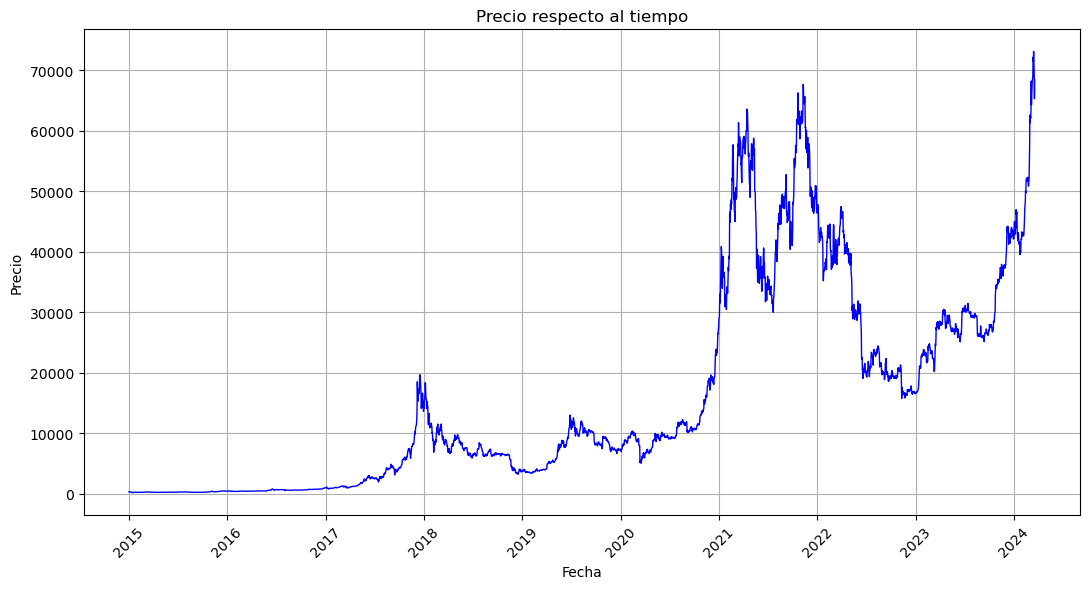

In [29]:
plt.figure(figsize=(11, 6))

plt.plot(df_bit['date'], df_bit['price'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()


# Grafica de la Capitalización de mercado Bitcoin 

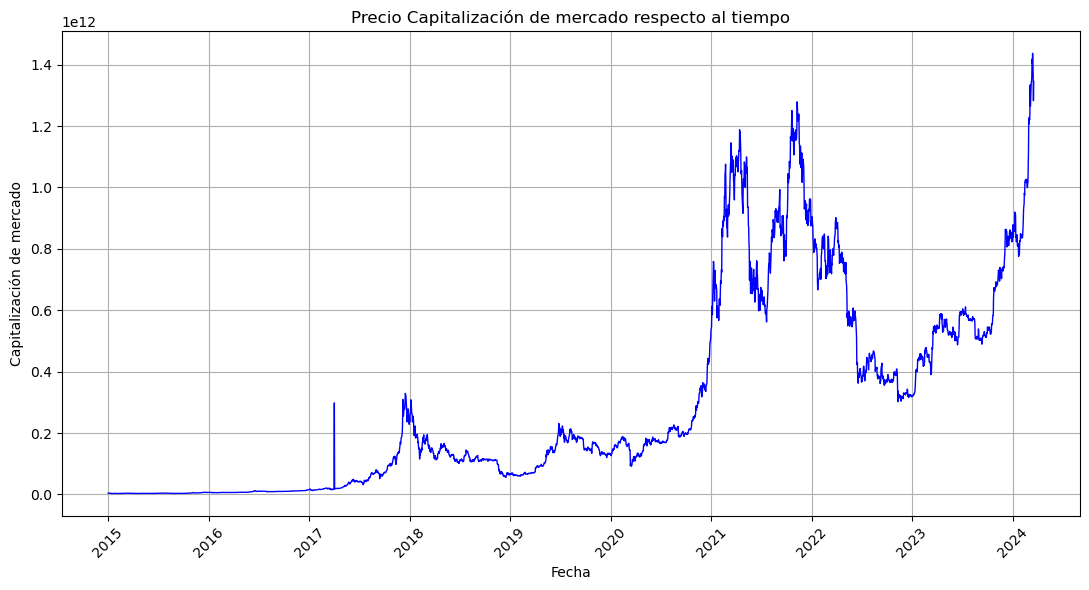

In [34]:
plt.figure(figsize=(11, 6))

plt.plot(df_bit['date'], df_bit['market_cap'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Capitalización de mercado')
plt.title('Precio Capitalización de mercado respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

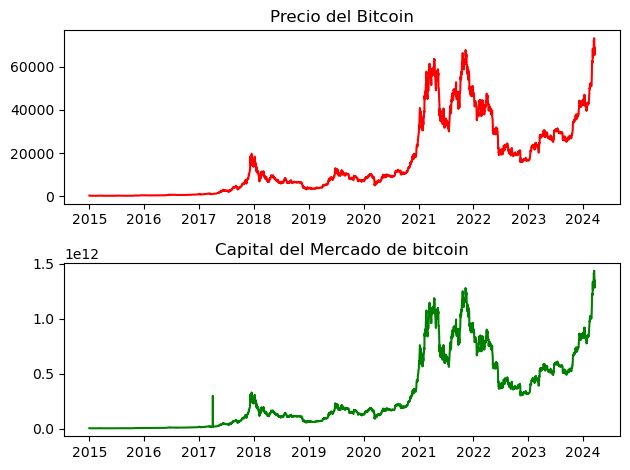

In [42]:
fig, axs = plt.subplots(2)
axs[0].plot(df_bit['date'], df_bit['price'], color='red')
axs[0].set_title('Precio del Bitcoin')

axs[1].plot(df_bit['date'], df_bit['market_cap'], color='green')
axs[1].set_title('Capital del Mercado de bitcoin')

plt.tight_layout()

plt.show()

# Proporcion

####  La proporción se calcula dividiendo el volumen total entre la capitalización de mercado y multiplicando por 100 para el porcentaje . 

In [38]:
df_bit['proporcion'] = df_bit['total_volume'] / df_bit['market_cap'] * 100
df_bit.info()
df_bit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3364 non-null   datetime64[ns]
 1   price         3364 non-null   float64       
 2   total_volume  3364 non-null   float64       
 3   market_cap    3364 non-null   float64       
 4   coin_name     3364 non-null   object        
 5   proporcion    3364 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 157.8+ KB


,date,price,total_volume,market_cap,coin_name,proporcion
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin,1.094546
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin,0.903321
2,2015-01-03,286.572,1.187789e+08,3.921358e+09,bitcoin,3.029026
3,2015-01-04,260.936,2.055001e+08,3.571640e+09,bitcoin,5.753664
4,2015-01-05,273.220,1.550381e+08,3.740880e+09,bitcoin,4.144429


# ~ Grafica Proporción Volumen/Capitalización Bitcoin ~

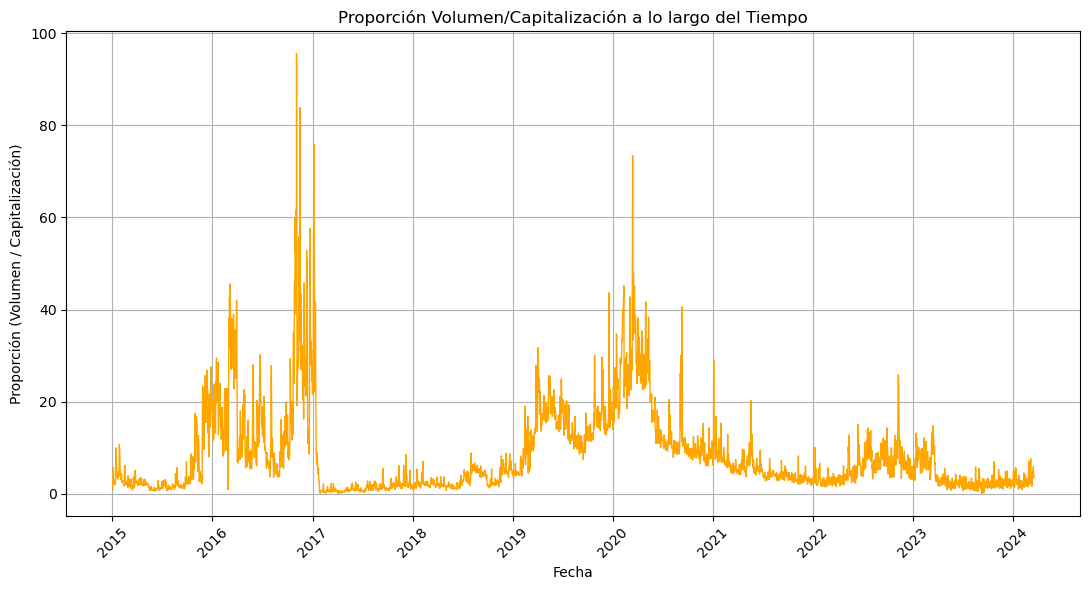

In [88]:
plt.figure(figsize=(11, 6))

plt.plot(df_bit['date'], df_bit['proporcion'], color='orange', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Proporción (Volumen / Capitalización)')
plt.title('Proporción Volumen/Capitalización a lo largo del Tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()


---

# Ethereum

# Cargamos los Datos

In [64]:
df_eth= pd.read_csv('ethereum.csv')
df_eth['date'] = pd.to_datetime(df_eth['date'])
df_eth.info()
df_eth.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3146 non-null   datetime64[ns]
 1   price         3146 non-null   float64       
 2   total_volume  3146 non-null   float64       
 3   market_cap    3145 non-null   float64       
 4   coin_name     3146 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 123.0+ KB


,date,price,total_volume,market_cap,coin_name
0,2015-08-07,2.831620,9.062200e+04,0.000000e+00,ethereum
1,2015-08-08,1.330750,3.680700e+05,8.033948e+07,ethereum
2,2015-08-10,0.687586,4.004641e+05,4.155631e+07,ethereum
3,2015-08-11,1.067379,1.518998e+06,6.453901e+07,ethereum
4,2015-08-12,1.256613,2.073893e+06,7.601326e+07,ethereum


# Preprocesado de datos 

In [65]:
valores_faltantes = df_eth.isnull().sum()
print("Valores faltantes antes de la corrección:\n")
valores_faltantes

Valores faltantes antes de la corrección:



date            0
price           0
total_volume    0
market_cap      1
coin_name       0
dtype: int64

In [66]:
df_eth_numeric = df_eth.select_dtypes(include=['number']) 
df_eth[df_eth_numeric.columns] = df_eth[df_eth_numeric.columns].fillna(df_eth[df_eth_numeric.columns].mean())

valores_faltantes_corregidos = df_eth.isnull().sum()
print("\nValores faltantes después de la corrección:\n")
valores_faltantes_corregidos


Valores faltantes después de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

# Grafica del precio del Ethereum

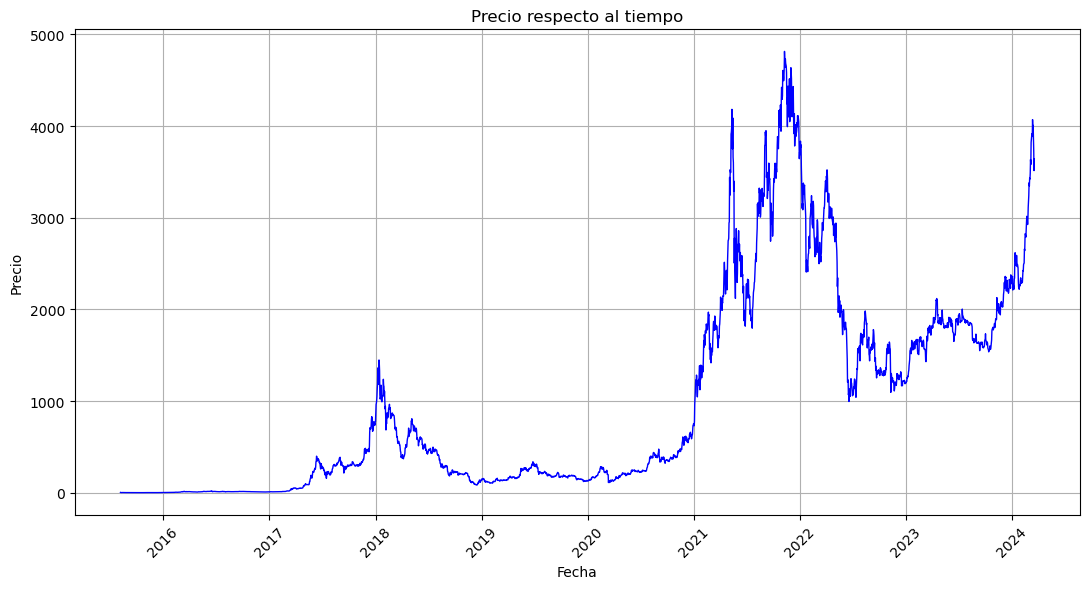

In [120]:
plt.figure(figsize=(11, 6))

plt.plot(df_eth['date'], df_eth['price'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()


# Grafica de la Capitalización de mercado Ethereum	

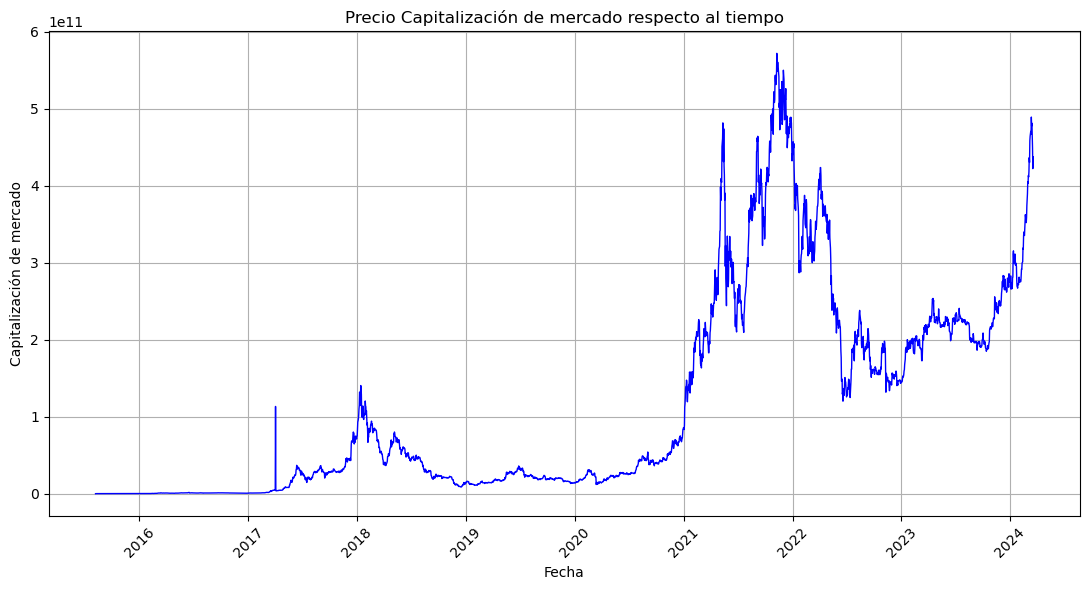

In [111]:
plt.figure(figsize=(11, 6))

plt.plot(df_eth['date'], df_eth['market_cap'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Capitalización de mercado')
plt.title('Precio Capitalización de mercado respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

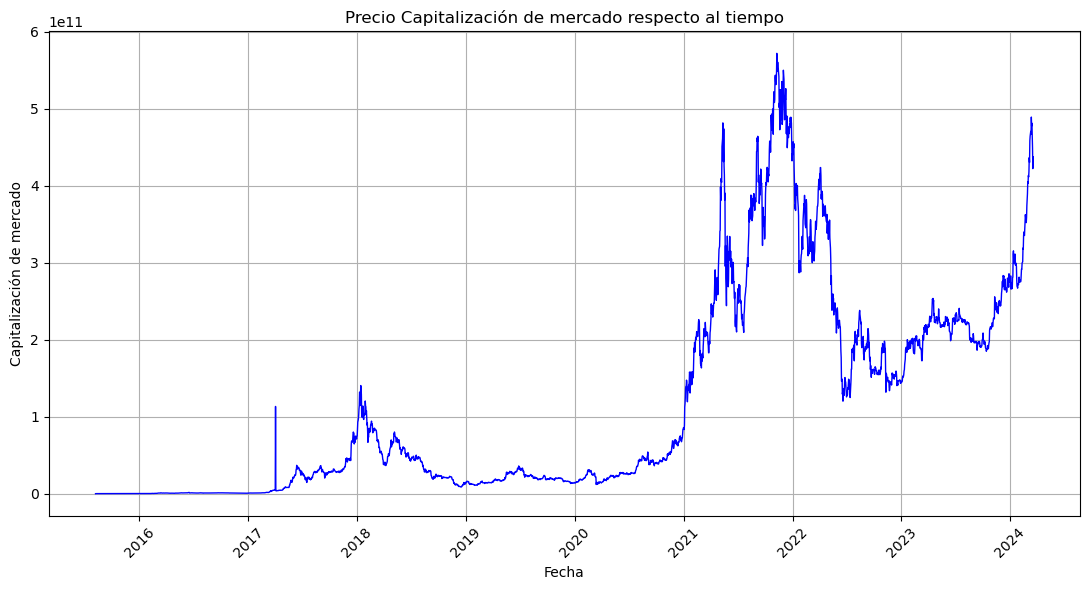

In [68]:
plt.figure(figsize=(11, 6))

plt.plot(df_eth['date'], df_eth['market_cap'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Capitalización de mercado')
plt.title('Precio Capitalización de mercado respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

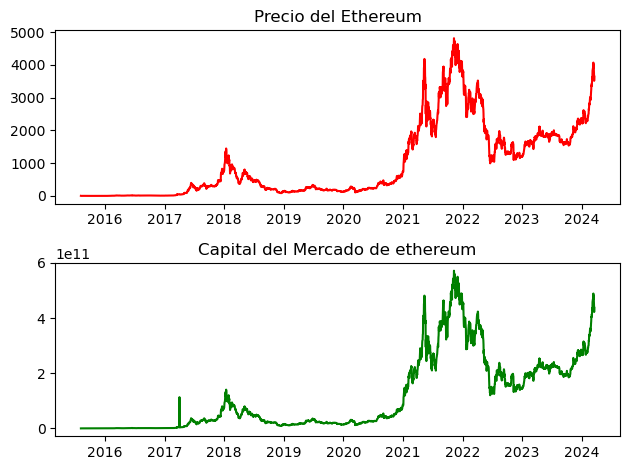

In [69]:
fig, axs = plt.subplots(2)
axs[0].plot(df_eth['date'], df_eth['price'], color='red')
axs[0].set_title('Precio del Ethereum')

axs[1].plot(df_eth['date'], df_eth['market_cap'], color='green')
axs[1].set_title('Capital del Mercado de ethereum')

plt.tight_layout()

plt.show()

# Proporcion del ethereum

In [71]:
df_eth['proporcion'] = df_eth['total_volume'] / df_eth['market_cap']* 100
df_eth.info()
df_eth.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3146 non-null   datetime64[ns]
 1   price         3146 non-null   float64       
 2   total_volume  3146 non-null   float64       
 3   market_cap    3146 non-null   float64       
 4   coin_name     3146 non-null   object        
 5   proporcion    3146 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 147.6+ KB


,date,price,total_volume,market_cap,coin_name,proporcion
0,2015-08-07,2.831620,9.062200e+04,0.000000e+00,ethereum,inf
1,2015-08-08,1.330750,3.680700e+05,8.033948e+07,ethereum,0.458143
2,2015-08-10,0.687586,4.004641e+05,4.155631e+07,ethereum,0.963666
3,2015-08-11,1.067379,1.518998e+06,6.453901e+07,ethereum,2.353613
4,2015-08-12,1.256613,2.073893e+06,7.601326e+07,ethereum,2.728331


# ~ Grafica Proporción Volumen/Capitalización del Ethereum ~

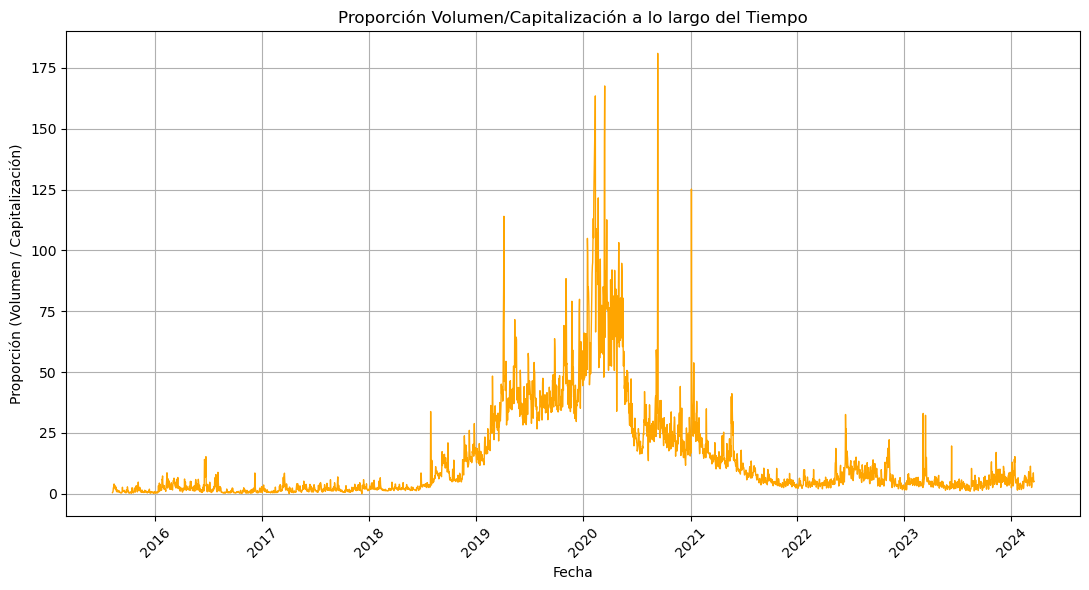

In [87]:
plt.figure(figsize=(11, 6))

plt.plot(df_eth['date'], df_eth['proporcion'], color='orange', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Proporción (Volumen / Capitalización)')
plt.title('Proporción Volumen/Capitalización a lo largo del Tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()


---

# Tether 

# Cargamos Datos

In [77]:
df_tet = pd.read_csv('tether.csv')
df_tet['date'] = pd.to_datetime(df_tet['date'])
df_tet.info()
df_tet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3287 non-null   datetime64[ns]
 1   price         3287 non-null   float64       
 2   total_volume  3287 non-null   float64       
 3   market_cap    3287 non-null   float64       
 4   coin_name     3287 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 128.5+ KB


,date,price,total_volume,market_cap,coin_name
0,2015-02-25,1.210160,5.0,304476.0,tether
1,2015-03-02,0.572521,2.0,144046.0,tether
2,2015-03-06,1.000000,50.0,251600.0,tether
3,2015-03-07,1.000000,58196.0,251600.0,tether
4,2015-03-08,1.000000,31.0,251600.0,tether


# Preprocesado de datos 

In [81]:
valores_faltantes = df_tet.isnull().sum()
print("Valores faltantes antes de la corrección:\n")
valores_faltantes


Valores faltantes antes de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

In [82]:
df_tet_numeric = df_tet.select_dtypes(include=['number']) 
df_tet[df_tet_numeric.columns] = df_tet[df_tet_numeric.columns].fillna(df_tet[df_tet_numeric.columns].mean())

valores_faltantes_corregidos = df_tet.isnull().sum()
print("\nValores faltantes después de la corrección:\n")
valores_faltantes_corregidos


Valores faltantes después de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

# Grafica Del precio del Tether

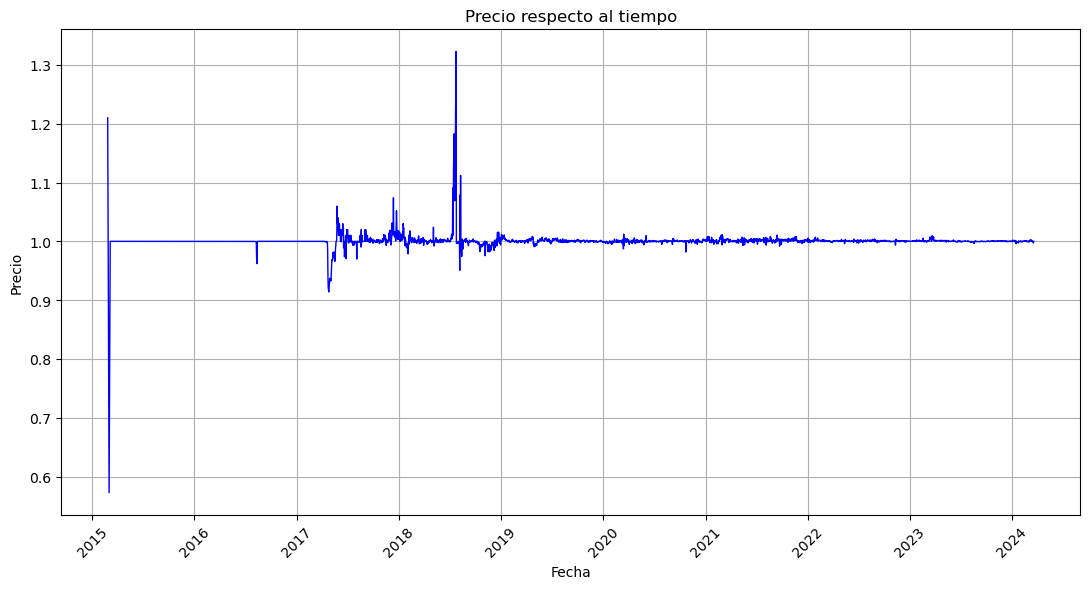

In [83]:
plt.figure(figsize=(11, 6))

plt.plot(df_tet['date'], df_tet['price'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

# Grafica de la Capitalización de mercado Tether

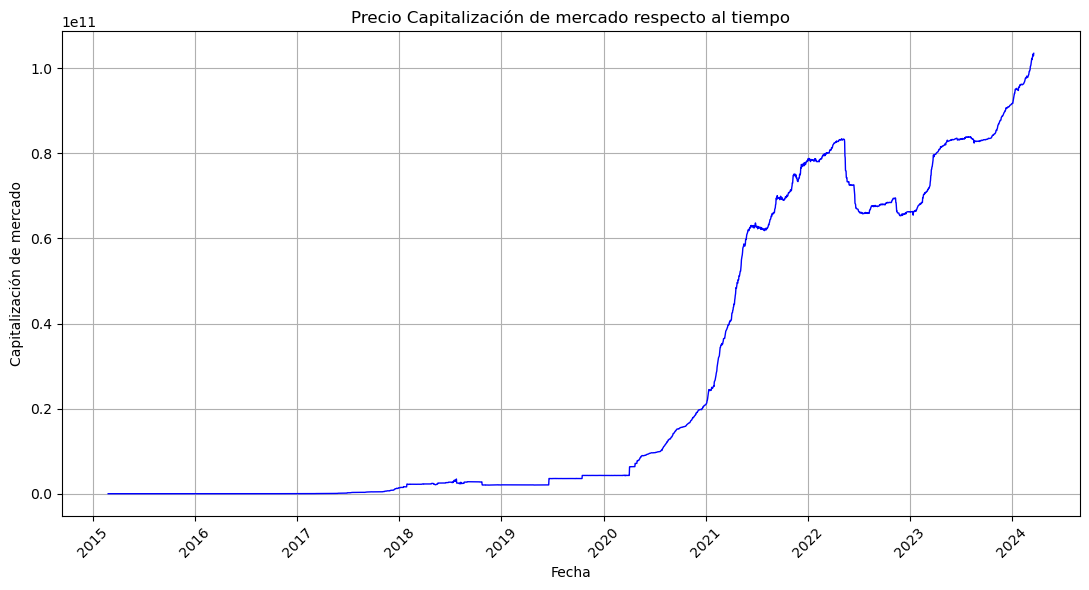

In [85]:
plt.figure(figsize=(11, 6))

plt.plot(df_tet['date'], df_tet['market_cap'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Capitalización de mercado')
plt.title('Precio Capitalización de mercado respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

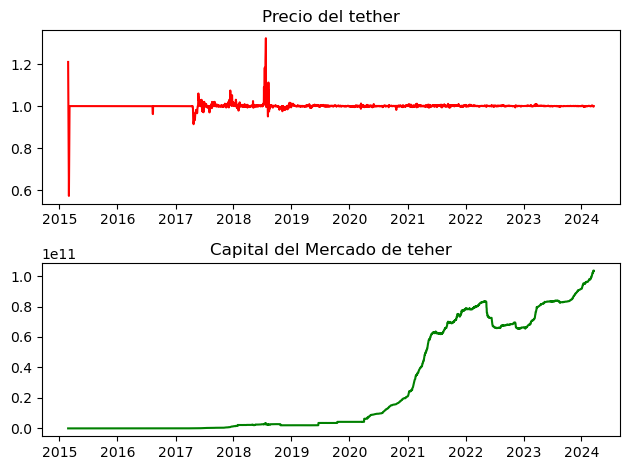

In [86]:
fig, axs = plt.subplots(2)
axs[0].plot(df_tet['date'], df_tet['price'], color='red')
axs[0].set_title('Precio del tether')

axs[1].plot(df_tet['date'], df_tet['market_cap'], color='green')
axs[1].set_title('Capital del Mercado de teher')

plt.tight_layout()

plt.show()

# Proporcion del Teher

In [89]:
df_tet['proporcion'] = df_tet['total_volume'] / df_tet['market_cap']* 100
df_tet.info()
df_tet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3287 non-null   datetime64[ns]
 1   price         3287 non-null   float64       
 2   total_volume  3287 non-null   float64       
 3   market_cap    3287 non-null   float64       
 4   coin_name     3287 non-null   object        
 5   proporcion    3287 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 154.2+ KB


,date,price,total_volume,market_cap,coin_name,proporcion
0,2015-02-25,1.210160,5.0,304476.0,tether,0.001642
1,2015-03-02,0.572521,2.0,144046.0,tether,0.001388
2,2015-03-06,1.000000,50.0,251600.0,tether,0.019873
3,2015-03-07,1.000000,58196.0,251600.0,tether,23.130366
4,2015-03-08,1.000000,31.0,251600.0,tether,0.012321


# ~ Grafica Proporción Volumen/Capitalización del Tether ~

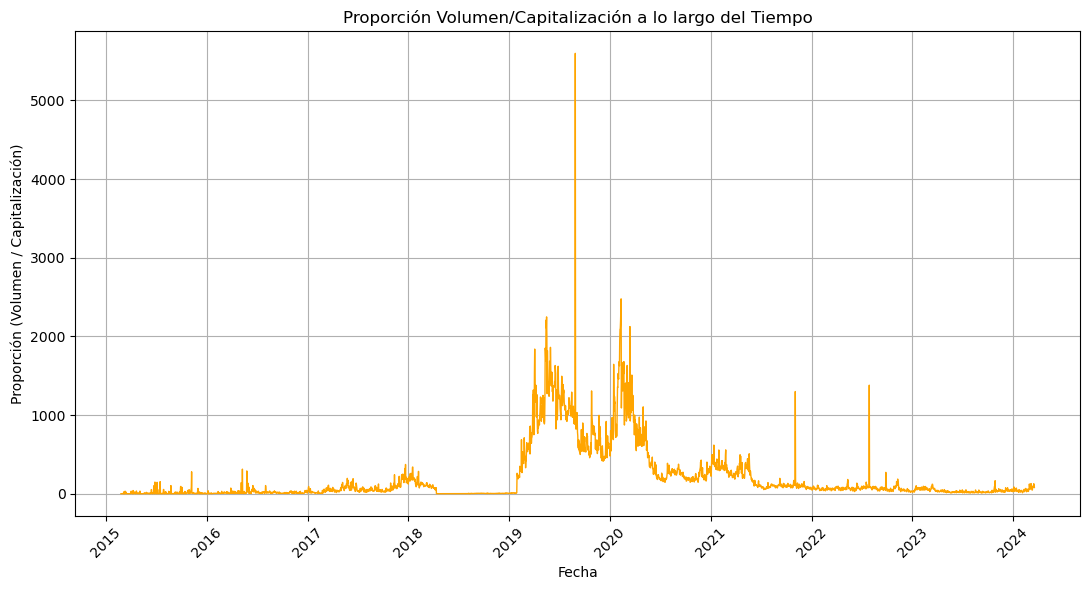

In [90]:
plt.figure(figsize=(11, 6))

plt.plot(df_tet['date'], df_tet['proporcion'], color='orange', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Proporción (Volumen / Capitalización)')
plt.title('Proporción Volumen/Capitalización a lo largo del Tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

---

# Solana


# Cargamos Datos 

In [92]:
df_sol = pd.read_csv('solana.csv')
df_sol['date'] = pd.to_datetime(df_sol['date'])
df_sol.info()
df_sol.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1438 non-null   datetime64[ns]
 1   price         1438 non-null   float64       
 2   total_volume  1438 non-null   float64       
 3   market_cap    1438 non-null   float64       
 4   coin_name     1438 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 56.3+ KB


,date,price,total_volume,market_cap,coin_name
0,2020-04-11,0.957606,9.267267e+07,7.827652e+06,solana
1,2020-04-12,0.784711,4.945869e+07,6.173608e+06,solana
2,2020-04-13,0.875994,3.782101e+07,7.269680e+06,solana
3,2020-04-14,0.786712,1.957921e+07,6.302364e+06,solana
4,2020-04-15,0.666673,1.752353e+07,5.306221e+06,solana


# Preprocesado de datos 

In [94]:
valores_faltantes = df_sol.isnull().sum()
print("Valores faltantes antes de la corrección:\n")
valores_faltantes

Valores faltantes antes de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

In [95]:
df_sol_numeric = df_sol.select_dtypes(include=['number']) 
df_sol[df_sol_numeric.columns] = df_sol[df_sol_numeric.columns].fillna(df_sol[df_sol_numeric.columns].mean())

valores_faltantes_corregidos = df_eth.isnull().sum()
print("\nValores faltantes después de la corrección:\n")
valores_faltantes_corregidos


Valores faltantes después de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
proporcion      0
dtype: int64

# Grafica del precio de solana

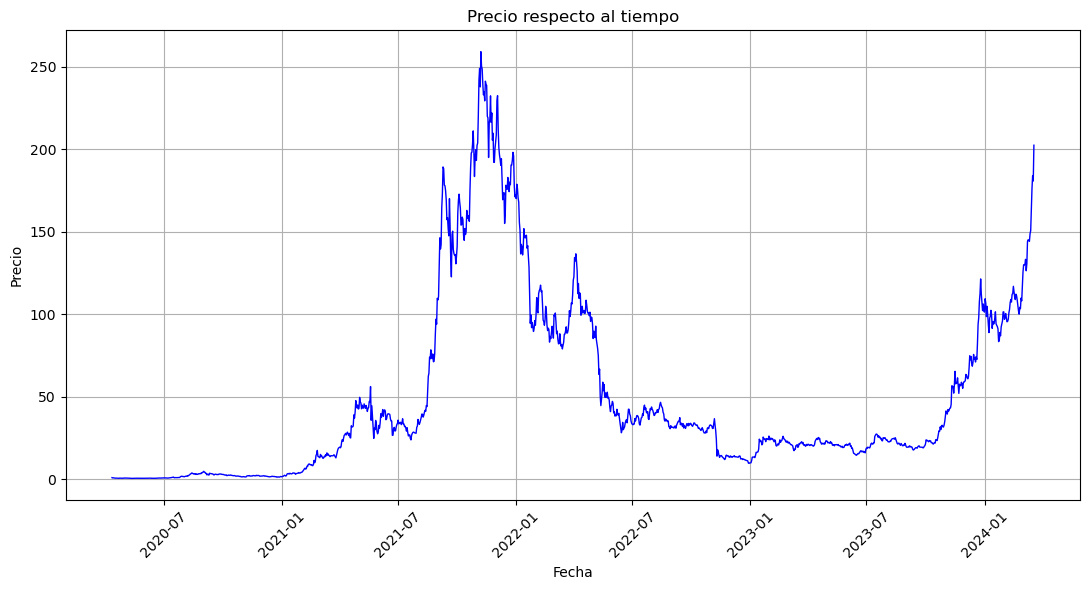

In [96]:
plt.figure(figsize=(11, 6))

plt.plot(df_sol['date'], df_sol['price'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

# Grafica de la Capitalización de mercado Solana

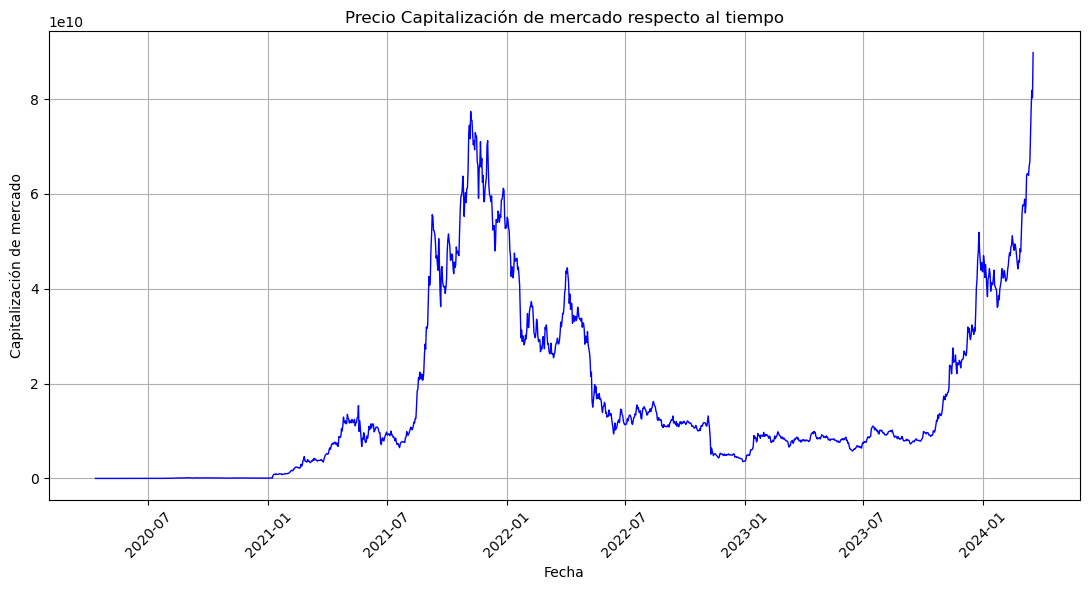

In [98]:
plt.figure(figsize=(11, 6))

plt.plot(df_sol['date'], df_sol['market_cap'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Capitalización de mercado')
plt.title('Precio Capitalización de mercado respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

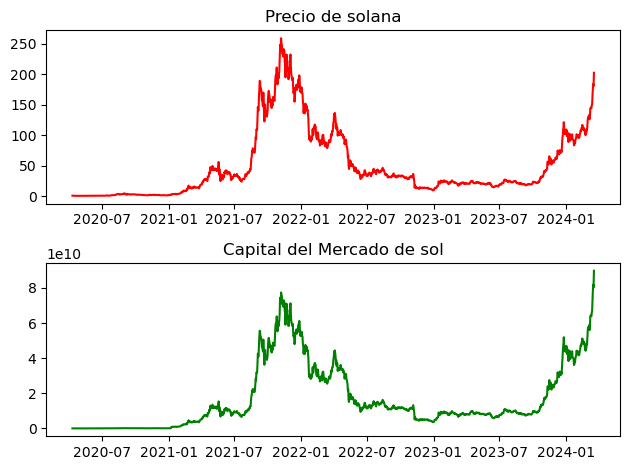

In [100]:
fig, axs = plt.subplots(2)
axs[0].plot(df_sol['date'], df_sol['price'], color='red')
axs[0].set_title('Precio de solana')

axs[1].plot(df_sol['date'], df_sol['market_cap'], color='green')
axs[1].set_title('Capital del Mercado de sol')

plt.tight_layout()

plt.show()

# Proporcion de Solana

In [101]:
df_sol['proporcion'] = df_sol['total_volume'] / df_sol['market_cap']* 100
df_sol.info()
df_sol.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1438 non-null   datetime64[ns]
 1   price         1438 non-null   float64       
 2   total_volume  1438 non-null   float64       
 3   market_cap    1438 non-null   float64       
 4   coin_name     1438 non-null   object        
 5   proporcion    1438 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 67.5+ KB


,date,price,total_volume,market_cap,coin_name,proporcion
0,2020-04-11,0.957606,9.267267e+07,7.827652e+06,solana,1183.914010
1,2020-04-12,0.784711,4.945869e+07,6.173608e+06,solana,801.131129
2,2020-04-13,0.875994,3.782101e+07,7.269680e+06,solana,520.256842
3,2020-04-14,0.786712,1.957921e+07,6.302364e+06,solana,310.664608
4,2020-04-15,0.666673,1.752353e+07,5.306221e+06,solana,330.245062


# ~ Grafica Proporción Volumen/Capitalización Solana ~

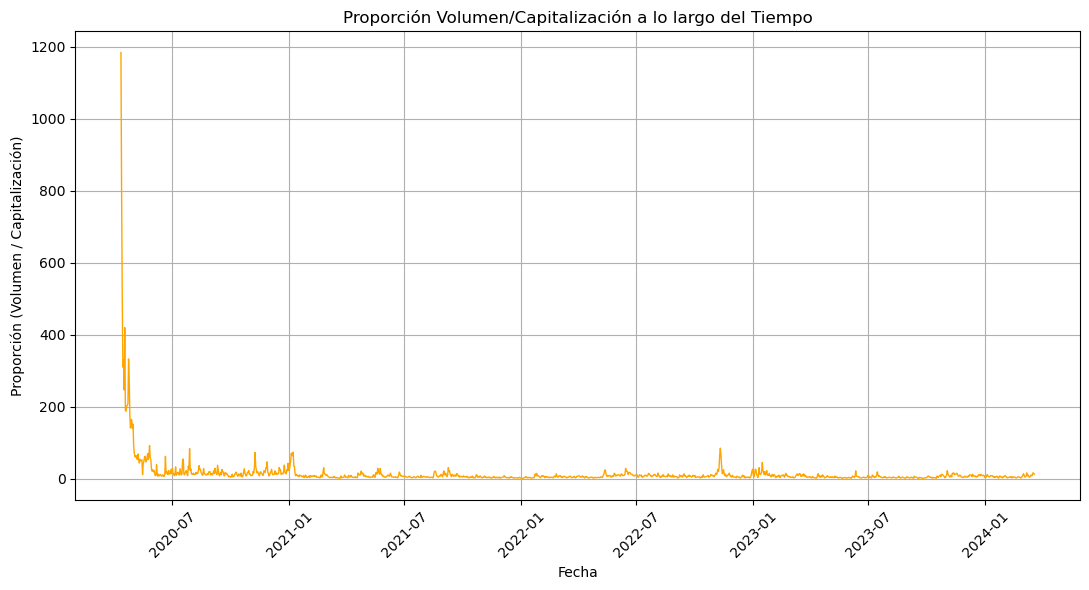

In [102]:
plt.figure(figsize=(11, 6))

plt.plot(df_sol['date'], df_sol['proporcion'], color='orange', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Proporción (Volumen / Capitalización)')
plt.title('Proporción Volumen/Capitalización a lo largo del Tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

---

# USDC

# Cargar Datos 

In [106]:
df_usdc = pd.read_csv('usd-coin.csv')
df_usdc['date'] = pd.to_datetime(df_usdc['date'])
df_usdc.info()
df_usdc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1992 non-null   datetime64[ns]
 1   price         1992 non-null   float64       
 2   total_volume  1992 non-null   float64       
 3   market_cap    1992 non-null   float64       
 4   coin_name     1992 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.9+ KB


,date,price,total_volume,market_cap,coin_name
0,2018-10-05,1.006242,31264.420430,0.0,usd-coin
1,2018-10-06,1.001530,20254.712255,0.0,usd-coin
2,2018-10-07,1.001177,49324.690669,0.0,usd-coin
3,2018-10-08,1.001906,47076.728142,0.0,usd-coin
4,2018-10-09,1.001983,55542.215509,0.0,usd-coin


# Preprocesado de datos 

In [107]:
valores_faltantes = df_usdc.isnull().sum()
print("Valores faltantes antes de la corrección:\n")
valores_faltantes

Valores faltantes antes de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

In [108]:
df_usdc_numeric = df_usdc.select_dtypes(include=['number']) 
df_usdc[df_usdc_numeric.columns] = df_usdc[df_usdc_numeric.columns].fillna(df_usdc[df_usdc_numeric.columns].mean())

valores_faltantes_corregidos = df_usdc.isnull().sum()
print("\nValores faltantes después de la corrección:\n")
valores_faltantes_corregidos



Valores faltantes después de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

# Grafica Del precio del USDC

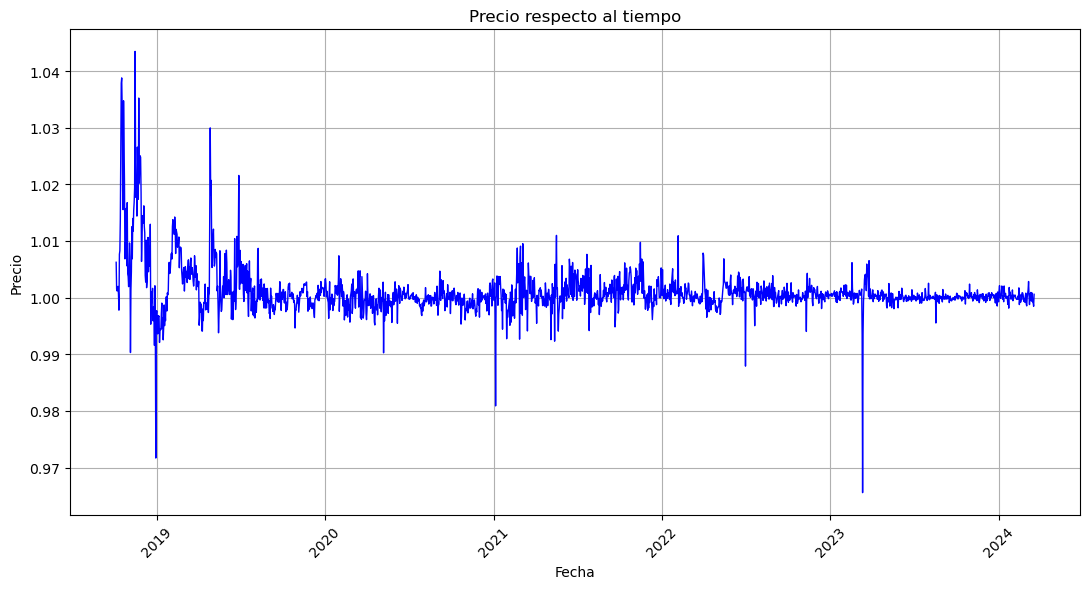

In [109]:
plt.figure(figsize=(11, 6))

plt.plot(df_usdc['date'], df_usdc['price'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()


# Grafica de la Capitalización de mercado USDC

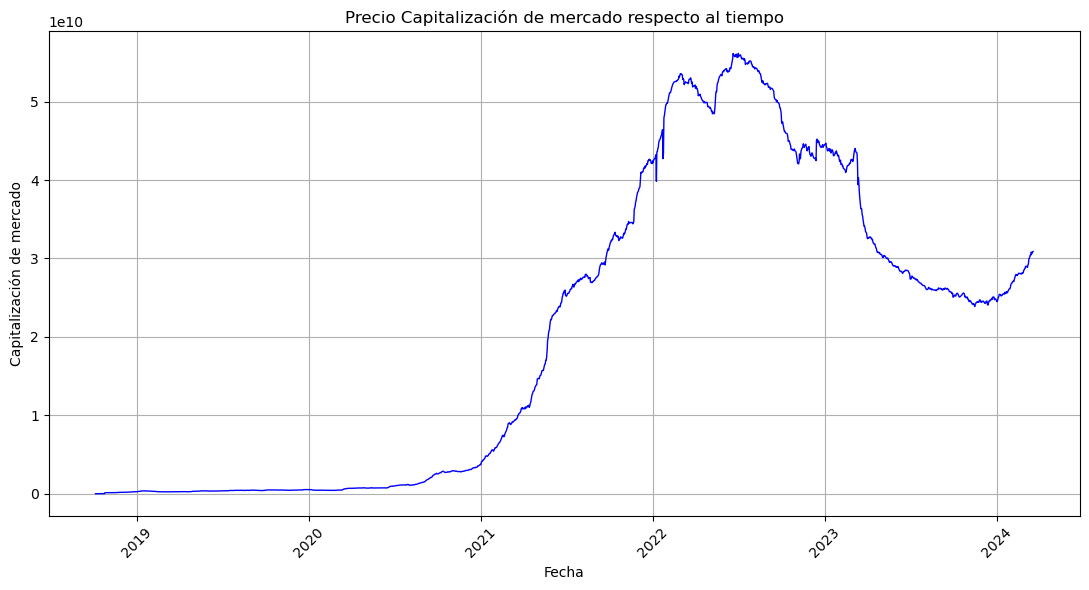

In [112]:
plt.figure(figsize=(11, 6))

plt.plot(df_usdc['date'], df_usdc['market_cap'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Capitalización de mercado')
plt.title('Precio Capitalización de mercado respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

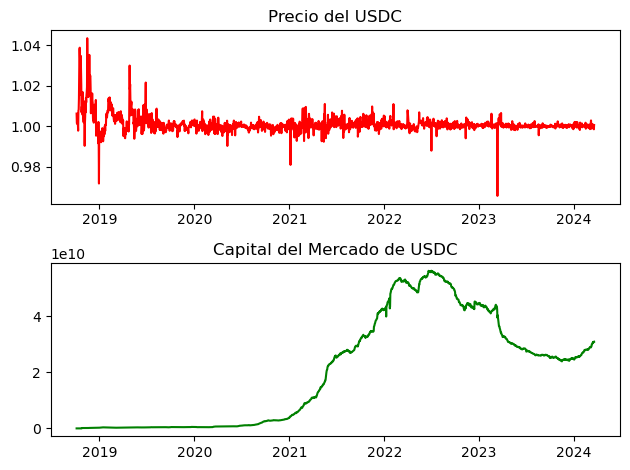

In [114]:
fig, axs = plt.subplots(2)
axs[0].plot(df_usdc['date'], df_usdc['price'], color='red')
axs[0].set_title('Precio del USDC')

axs[1].plot(df_usdc['date'], df_usdc['market_cap'], color='green')
axs[1].set_title('Capital del Mercado de USDC')

plt.tight_layout()

plt.show()


# Proporcion de USDC

In [115]:
df_usdc['market_cap'] = pd.to_numeric(df_usdc['market_cap'], errors='coerce')
df_usdc['proporcion'] = df_usdc['total_volume'] / df_usdc['market_cap']* 100
df_usdc.info()
df_usdc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1992 non-null   datetime64[ns]
 1   price         1992 non-null   float64       
 2   total_volume  1992 non-null   float64       
 3   market_cap    1992 non-null   float64       
 4   coin_name     1992 non-null   object        
 5   proporcion    1992 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 93.5+ KB


,date,price,total_volume,market_cap,coin_name,proporcion
0,2018-10-05,1.006242,31264.420430,0.0,usd-coin,inf
1,2018-10-06,1.001530,20254.712255,0.0,usd-coin,inf
2,2018-10-07,1.001177,49324.690669,0.0,usd-coin,inf
3,2018-10-08,1.001906,47076.728142,0.0,usd-coin,inf
4,2018-10-09,1.001983,55542.215509,0.0,usd-coin,inf


# ~ Grafica Proporción Volumen/Capitalización USDC ~

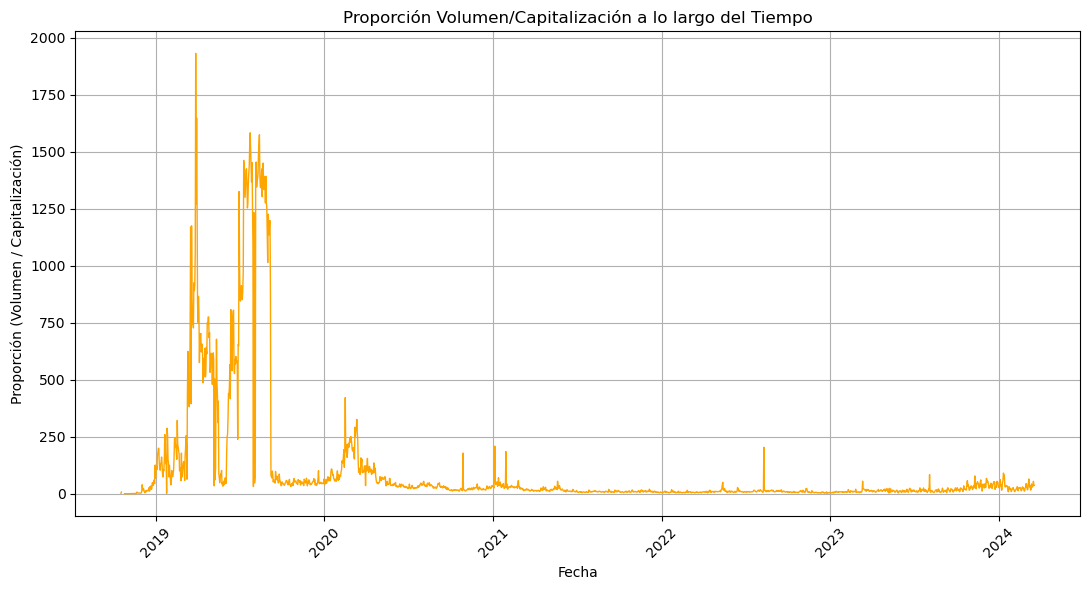

In [116]:
plt.figure(figsize=(11, 6))

plt.plot(df_usdc['date'], df_usdc['proporcion'], color='orange', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Proporción (Volumen / Capitalización)')
plt.title('Proporción Volumen/Capitalización a lo largo del Tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

---

# Avalanche

# Cargar Datos 

In [117]:
df_ava = pd.read_csv('avalanche-2.csv')
df_ava['date'] = pd.to_datetime(df_ava['date'])
df_ava.info()
df_ava.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1274 non-null   datetime64[ns]
 1   price         1274 non-null   float64       
 2   total_volume  1274 non-null   float64       
 3   market_cap    1274 non-null   float64       
 4   coin_name     1274 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 49.9+ KB


,date,price,total_volume,market_cap,coin_name
0,2020-09-22,5.284244,2.458573e+08,1.243579e+08,avalanche-2
1,2020-09-23,5.284244,2.458573e+08,1.243579e+08,avalanche-2
2,2020-09-24,3.491229,9.734243e+07,8.633525e+07,avalanche-2
3,2020-09-25,4.573891,6.966517e+07,1.122094e+08,avalanche-2
4,2020-09-26,4.702974,4.195075e+07,1.154319e+08,avalanche-2


# Preprocesado de datos 

In [118]:
valores_faltantes = df_ava.isnull().sum()
print("Valores faltantes antes de la corrección:\n")
valores_faltantes

Valores faltantes antes de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

In [119]:
df_ava_numeric = df_ava.select_dtypes(include=['number']) 
df_ava[df_ava_numeric.columns] = df_ava[df_ava_numeric.columns].fillna(df_ava[df_ava_numeric.columns].mean())

valores_faltantes_corregidos = df_ava.isnull().sum()
print("\nValores faltantes después de la corrección:\n")
valores_faltantes_corregidos


Valores faltantes después de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

# Grafica del precio de Avalanche

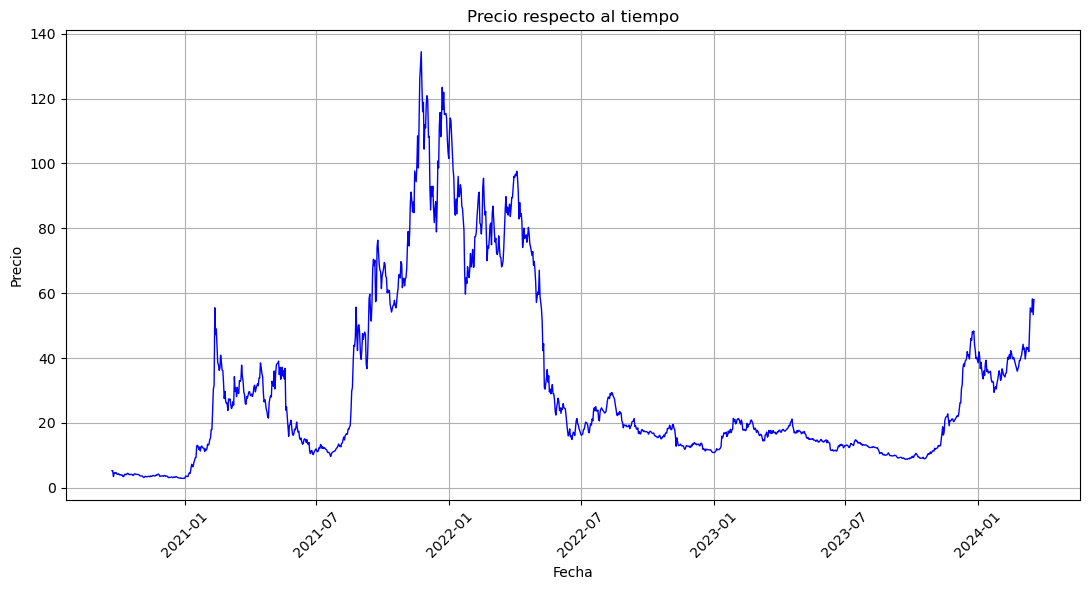

In [121]:
plt.figure(figsize=(11, 6))

plt.plot(df_ava['date'], df_ava['price'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

# Grafica de la Capitalización de mercado avalanche

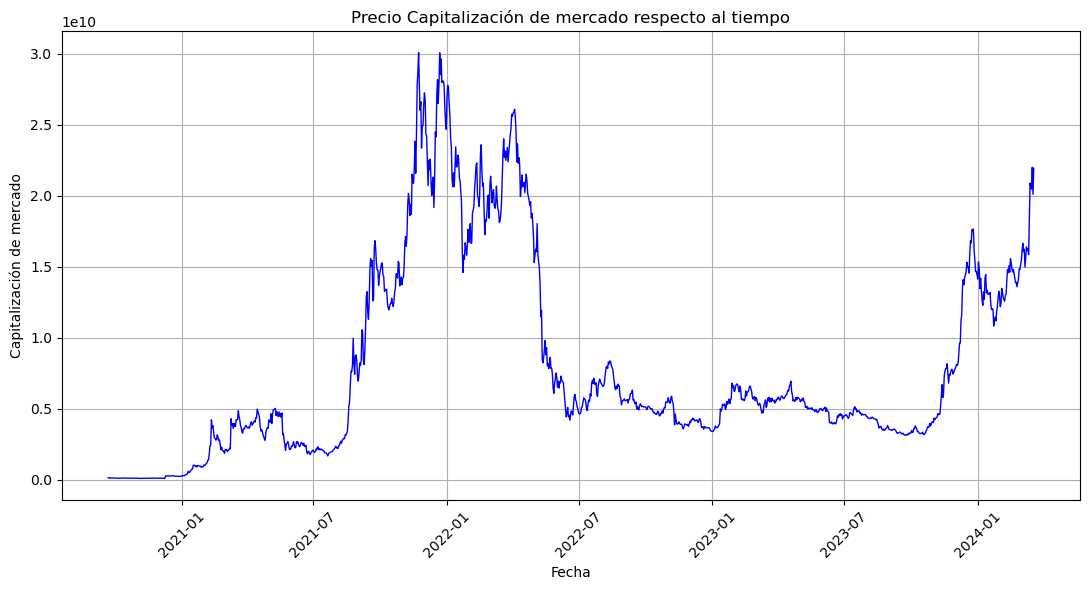

In [123]:
plt.figure(figsize=(11, 6))

plt.plot(df_ava['date'], df_ava['market_cap'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Capitalización de mercado')
plt.title('Precio Capitalización de mercado respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

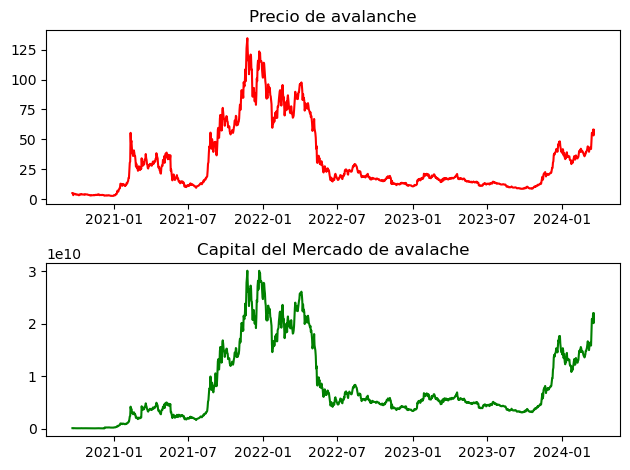

In [125]:
fig, axs = plt.subplots(2)
axs[0].plot(df_ava['date'], df_ava['price'], color='red')
axs[0].set_title('Precio de avalanche')

axs[1].plot(df_ava['date'], df_ava['market_cap'], color='green')
axs[1].set_title('Capital del Mercado de avalache')

plt.tight_layout()

plt.show()

# Proporcion de avalanche

In [126]:
df_ava['proporcion'] = df_ava['total_volume'] / df_ava['market_cap']* 100
df_ava.info()
df_ava.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1274 non-null   datetime64[ns]
 1   price         1274 non-null   float64       
 2   total_volume  1274 non-null   float64       
 3   market_cap    1274 non-null   float64       
 4   coin_name     1274 non-null   object        
 5   proporcion    1274 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 59.8+ KB


,date,price,total_volume,market_cap,coin_name,proporcion
0,2020-09-22,5.284244,2.458573e+08,1.243579e+08,avalanche-2,197.701313
1,2020-09-23,5.284244,2.458573e+08,1.243579e+08,avalanche-2,197.701313
2,2020-09-24,3.491229,9.734243e+07,8.633525e+07,avalanche-2,112.749354
3,2020-09-25,4.573891,6.966517e+07,1.122094e+08,avalanche-2,62.084984
4,2020-09-26,4.702974,4.195075e+07,1.154319e+08,avalanche-2,36.342434


# ~ Grafica Proporción Volumen/Capitalización avalanche~

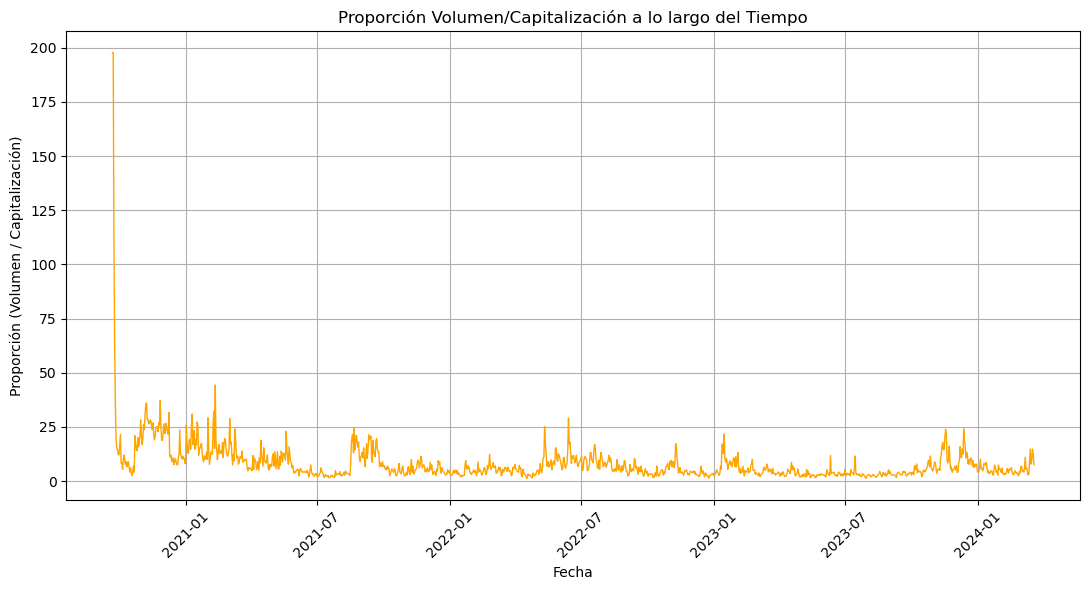

In [127]:
plt.figure(figsize=(11, 6))

plt.plot(df_ava['date'], df_ava['proporcion'], color='orange', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Proporción (Volumen / Capitalización)')
plt.title('Proporción Volumen/Capitalización a lo largo del Tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

# Cardano

# Cargar Datos 

In [129]:
df_car = pd.read_csv('cardano.csv')
df_car['date'] = pd.to_datetime(df_car['date'])
df_car.info()
df_car.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2344 non-null   datetime64[ns]
 1   price         2344 non-null   float64       
 2   total_volume  2344 non-null   float64       
 3   market_cap    2344 non-null   float64       
 4   coin_name     2344 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 91.7+ KB


,date,price,total_volume,market_cap,coin_name
0,2017-10-18,0.026845,2.351678e+06,6.960214e+08,cardano
1,2017-10-19,0.026830,2.815156e+06,6.956220e+08,cardano
2,2017-10-20,0.030300,8.883473e+06,7.855800e+08,cardano
3,2017-10-21,0.028588,5.308857e+06,7.412021e+08,cardano
4,2017-10-22,0.027796,2.901876e+06,7.206698e+08,cardano


# Preprocesado de datos 

In [130]:
valores_faltantes = df_car.isnull().sum()
print("Valores faltantes antes de la corrección:\n")
valores_faltantes

Valores faltantes antes de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

In [131]:
df_car_numeric = df_car.select_dtypes(include=['number']) 
df_car[df_car_numeric.columns] = df_car[df_car_numeric.columns].fillna(df_car[df_car_numeric.columns].mean())

valores_faltantes_corregidos = df_car.isnull().sum()
print("\nValores faltantes después de la corrección:\n")
valores_faltantes_corregidos


Valores faltantes después de la corrección:



date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

# Grafica del precio del cardano

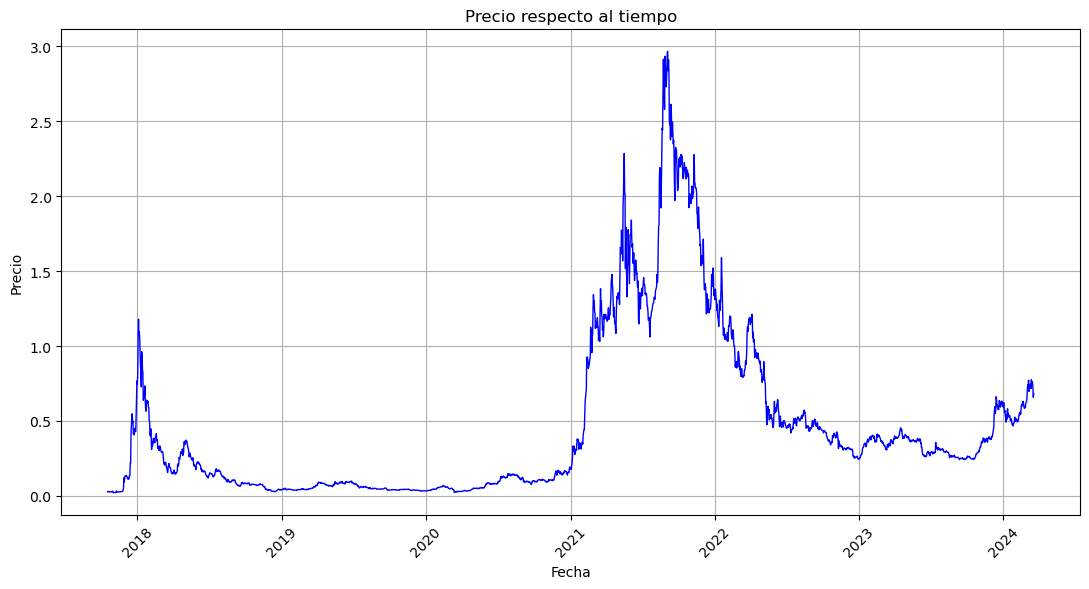

In [132]:
plt.figure(figsize=(11, 6))

plt.plot(df_car['date'], df_car['price'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

# Grafica de la Capitalización de mercado cardano

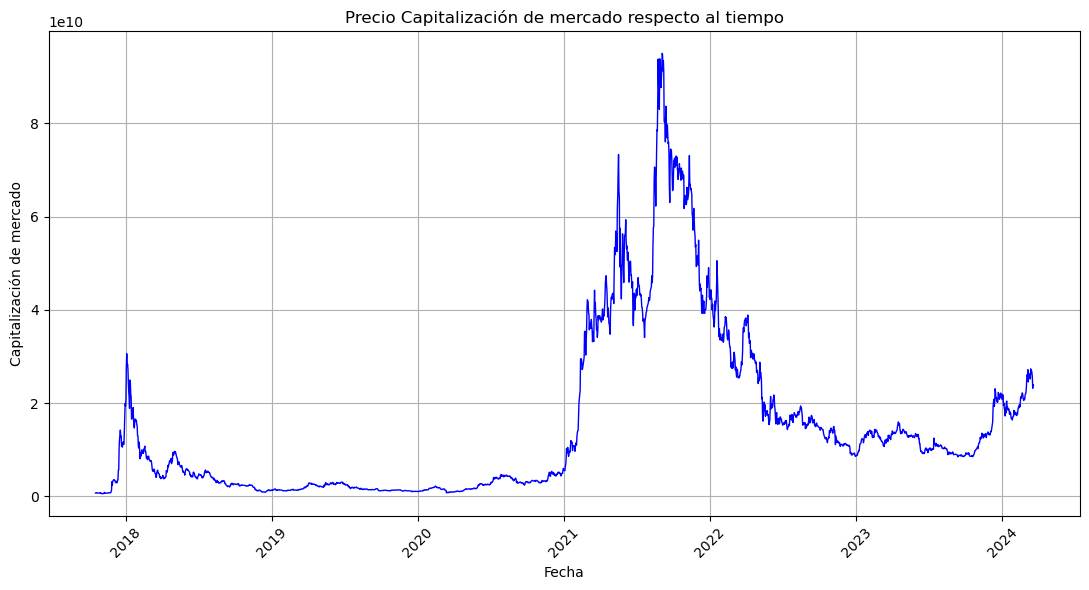

In [133]:
plt.figure(figsize=(11, 6))

plt.plot(df_car['date'], df_car['market_cap'], color='blue', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Capitalización de mercado')
plt.title('Precio Capitalización de mercado respecto al tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

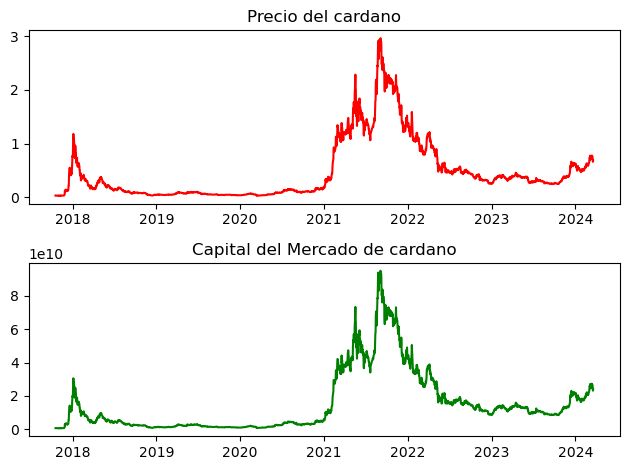

In [134]:
fig, axs = plt.subplots(2)
axs[0].plot(df_car['date'], df_car['price'], color='red')
axs[0].set_title('Precio del cardano')

axs[1].plot(df_car['date'], df_car['market_cap'], color='green')
axs[1].set_title('Capital del Mercado de cardano')

plt.tight_layout()

plt.show()

# Proporcion de cardano

In [135]:
df_car['proporcion'] = df_car['total_volume'] / df_car['market_cap']* 100
df_car.info()
df_car.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2344 non-null   datetime64[ns]
 1   price         2344 non-null   float64       
 2   total_volume  2344 non-null   float64       
 3   market_cap    2344 non-null   float64       
 4   coin_name     2344 non-null   object        
 5   proporcion    2344 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 110.0+ KB


,date,price,total_volume,market_cap,coin_name,proporcion
0,2017-10-18,0.026845,2.351678e+06,6.960214e+08,cardano,0.337874
1,2017-10-19,0.026830,2.815156e+06,6.956220e+08,cardano,0.404696
2,2017-10-20,0.030300,8.883473e+06,7.855800e+08,cardano,1.130817
3,2017-10-21,0.028588,5.308857e+06,7.412021e+08,cardano,0.716250
4,2017-10-22,0.027796,2.901876e+06,7.206698e+08,cardano,0.402664


# ~ Grafica Proporción Volumen/Capitalización Cardano ~

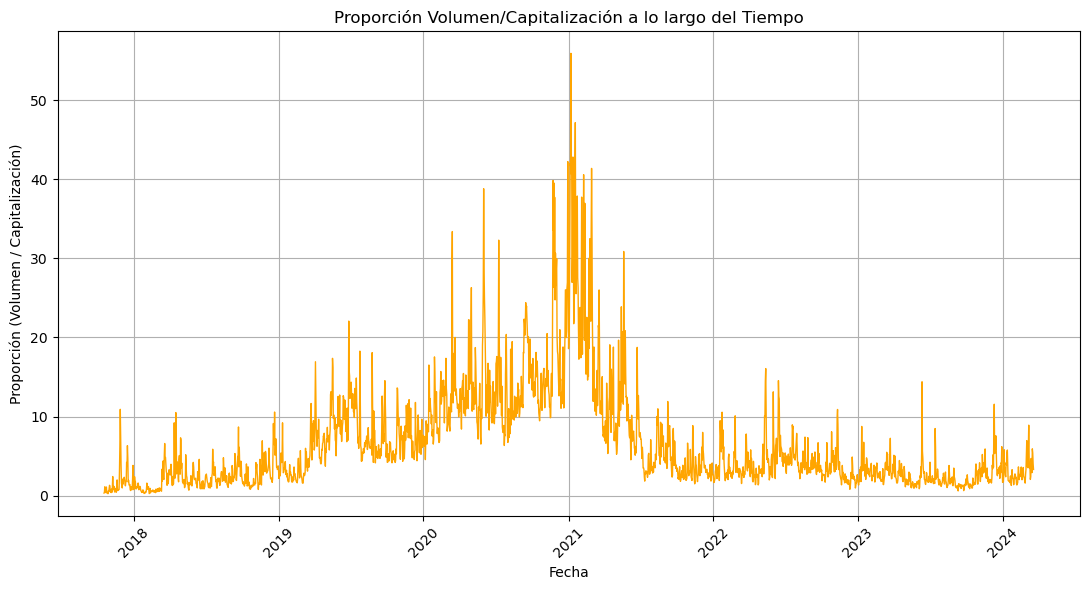

In [136]:
plt.figure(figsize=(11, 6))

plt.plot(df_car['date'], df_car['proporcion'], color='orange', linestyle='-', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Proporción (Volumen / Capitalización)')
plt.title('Proporción Volumen/Capitalización a lo largo del Tiempo')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

---

# Grafica de Precios de criptomendas 

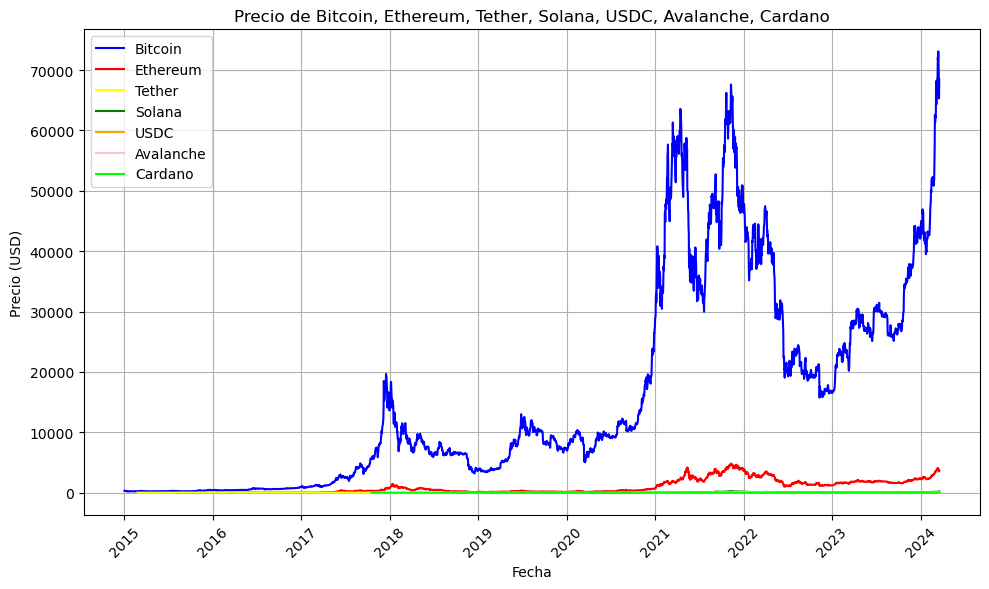

In [153]:
plt.figure(figsize=(10, 6)) 

plt.plot(df_bit['date'], df_bit['price'], label='Bitcoin', color='blue')

plt.plot(df_eth['date'], df_eth['price'], label='Ethereum', color='red')

plt.plot(df_tet['date'], df_tet['price'], label='Tether', color='yellow')

plt.plot(df_sol['date'], df_sol['price'], label='Solana', color='green')

plt.plot(df_usdc['date'], df_usdc['price'], label='USDC', color='orange')

plt.plot(df_ava['date'], df_ava['price'], label='Avalanche', color='pink')

plt.plot(df_car['date'], df_car['price'], label='Cardano', color='lime')

plt.title('Precio de Bitcoin, Ethereum, Tether, Solana, USDC, Avalanche, Cardano') 
plt.xlabel('Fecha') 
plt.ylabel('Precio (USD)') 
plt.legend()  

plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

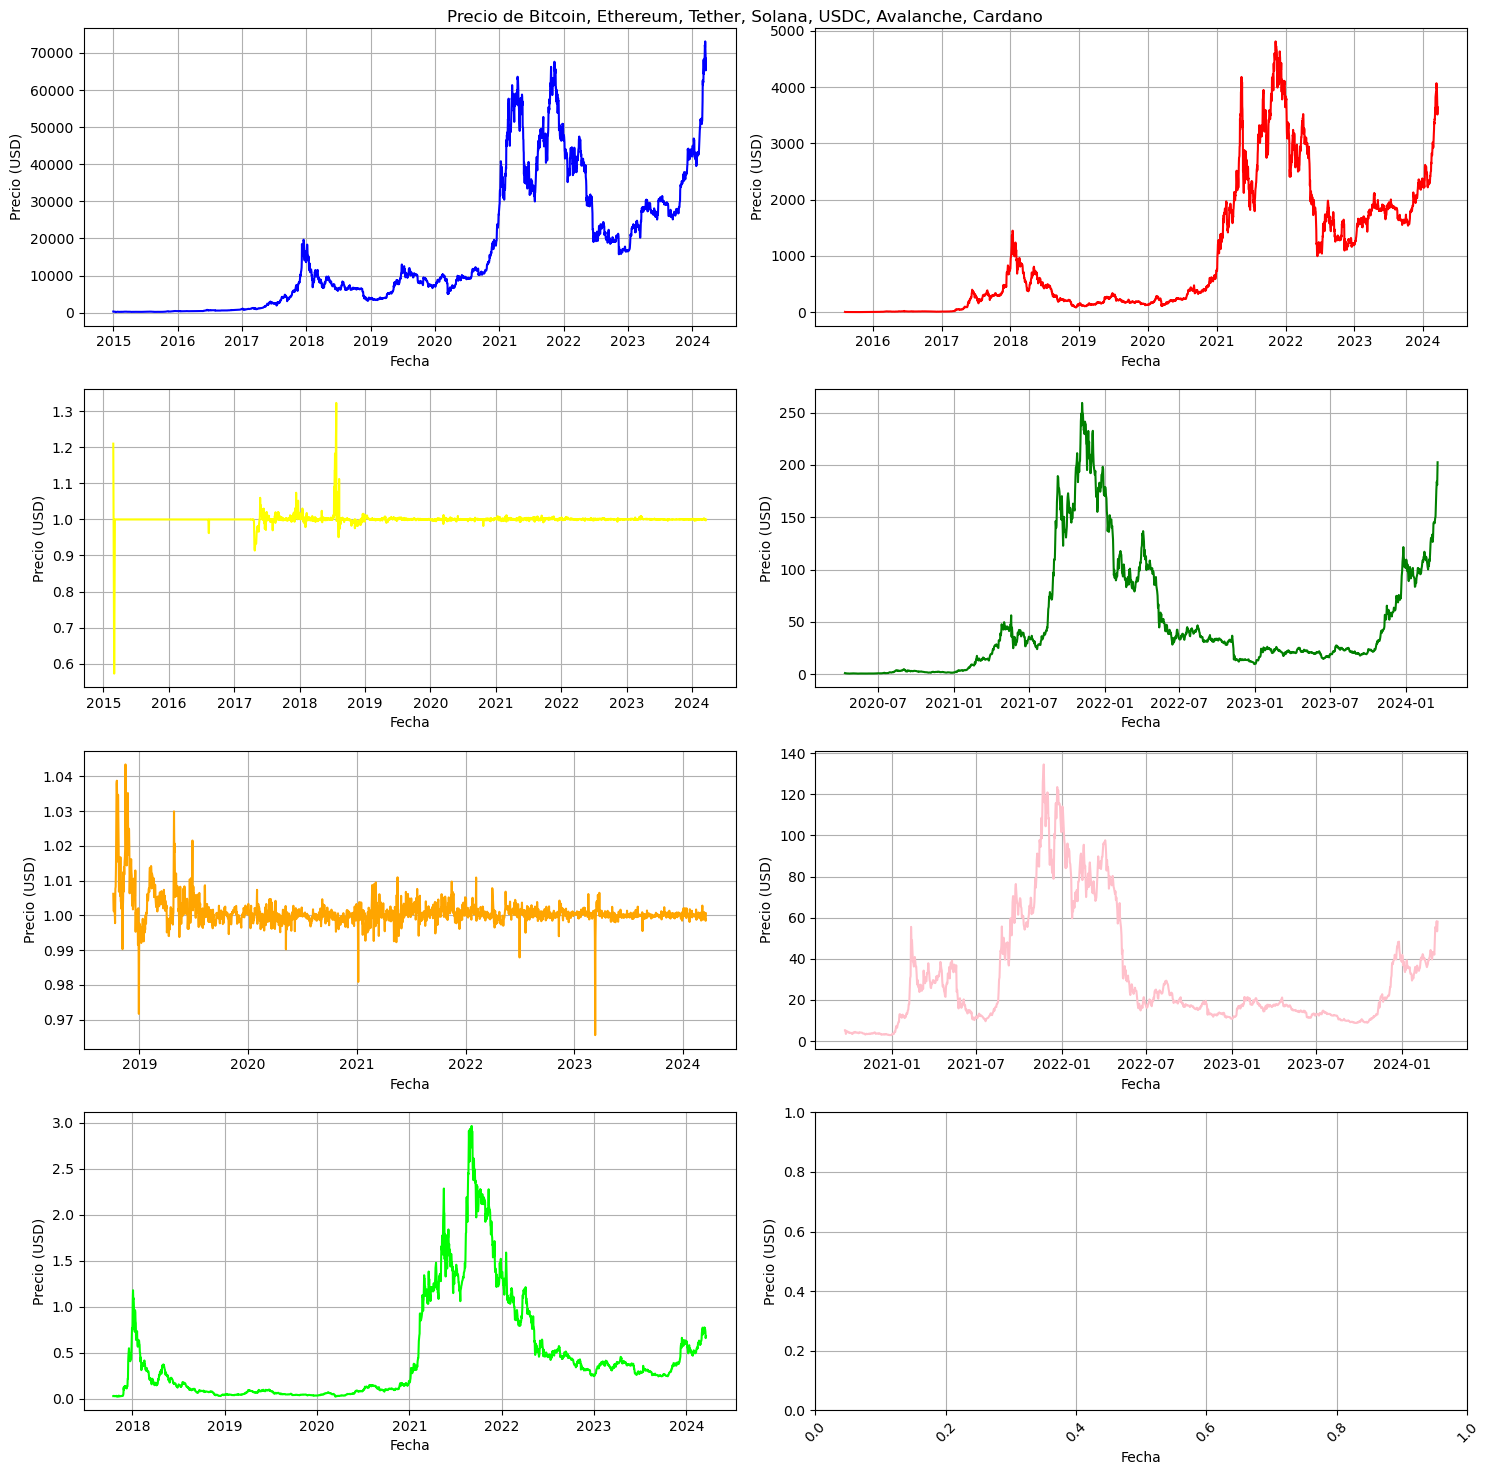

In [155]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

axs[0, 0].plot(df_bit['date'], df_bit['price'], label='Bitcoin', color='blue')
axs[0, 1].plot(df_eth['date'], df_eth['price'], label='Ethereum', color='red')
axs[1, 0].plot(df_tet['date'], df_tet['price'], label='Tether', color='yellow')
axs[1, 1].plot(df_sol['date'], df_sol['price'], label='Solana', color='green')
axs[2, 0].plot(df_usdc['date'], df_usdc['price'], label='USDC', color='orange')
axs[2, 1].plot(df_ava['date'], df_ava['price'], label='Avalanche', color='pink')
axs[3, 0].plot(df_car['date'], df_car['price'], label='Cardano', color='lime')

for ax in axs.flat:
    ax.set(xlabel='Fecha', ylabel='Precio (USD)')
    ax.grid(True)
    if ax.get_legend():
        ax.legend()

plt.suptitle('Precio de Bitcoin, Ethereum, Tether, Solana, USDC, Avalanche, Cardano')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Capital del Mercado de criptomonedas 


La capitalización de mercado de una criptomoneda es el valor total de todas las unidades de esa criptomoneda en circulación multiplicado por el precio actual de cada unidad. En otras palabras, es la suma del valor de todas las monedas de esa criptomoneda que existen en el mercado.

Cuando hablamos de que las gráficas de capitalización de mercado suben o bajan, nos referimos a los cambios en el valor total de esa criptomoneda en circulación en un momento dado. Aquí están las implicaciones comunes de que la capitalización del mercado de una criptomoneda suba o baje:

Capitalización del mercado en aumento: Si la capitalización de mercado de una criptomoneda está subiendo, significa que el valor total de todas las monedas en circulación está aumentando. Esto puede ocurrir debido a un aumento en el precio de cada unidad de la criptomoneda, un aumento en la cantidad de la criptomoneda en circulación o ambos. Los inversores y traders a menudo ven un aumento en la capitalización de mercado como una señal positiva, ya que indica un mayor interés y confianza en la criptomoneda.

Capitalización del mercado en descenso: Por otro lado, si la capitalización de mercado de una criptomoneda está disminuyendo, significa que el valor total de todas las monedas en circulación está cayendo. Esto puede ocurrir debido a una disminución en el precio de cada unidad de la criptomoneda, una reducción en la cantidad de la criptomoneda en circulación o ambos. Una disminución en la capitalización de mercado a menudo se interpreta como una señal negativa, ya que puede indicar una disminución en la confianza de los inversores o problemas en el ecosistema de la criptomoneda.

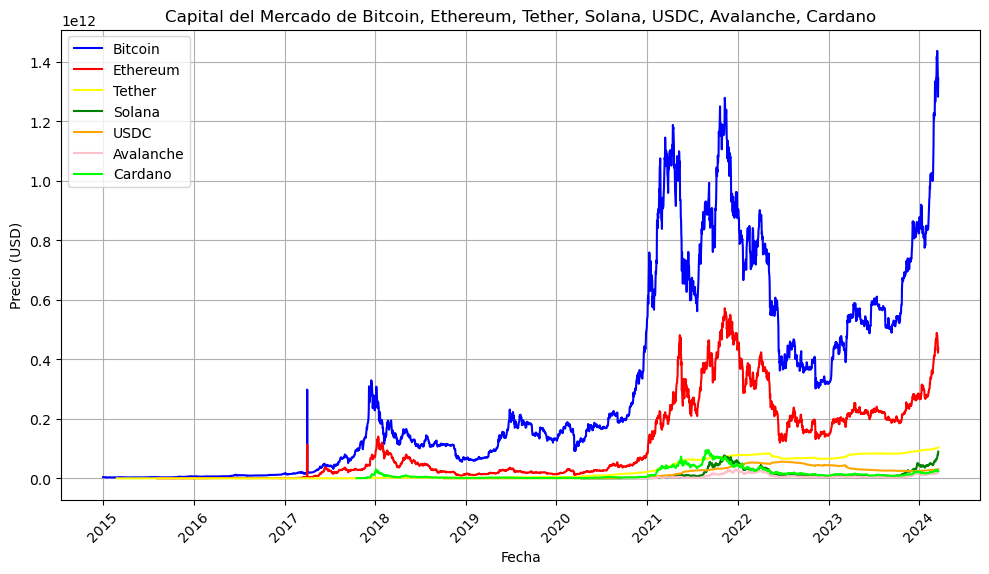

In [157]:
plt.figure(figsize=(10, 6)) 

plt.plot(df_bit['date'], df_bit['market_cap'], label='Bitcoin', color='blue')

plt.plot(df_eth['date'], df_eth['market_cap'], label='Ethereum', color='red')

plt.plot(df_tet['date'], df_tet['market_cap'], label='Tether', color='yellow')

plt.plot(df_sol['date'], df_sol['market_cap'], label='Solana', color='green')

plt.plot(df_usdc['date'], df_usdc['market_cap'], label='USDC', color='orange')

plt.plot(df_ava['date'], df_ava['market_cap'], label='Avalanche', color='pink')

plt.plot(df_car['date'], df_car['market_cap'], label='Cardano', color='lime')

plt.title('Capital del Mercado de Bitcoin, Ethereum, Tether, Solana, USDC, Avalanche, Cardano') 
plt.xlabel('Fecha') 
plt.ylabel('Precio (USD)') 
plt.legend()  

plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

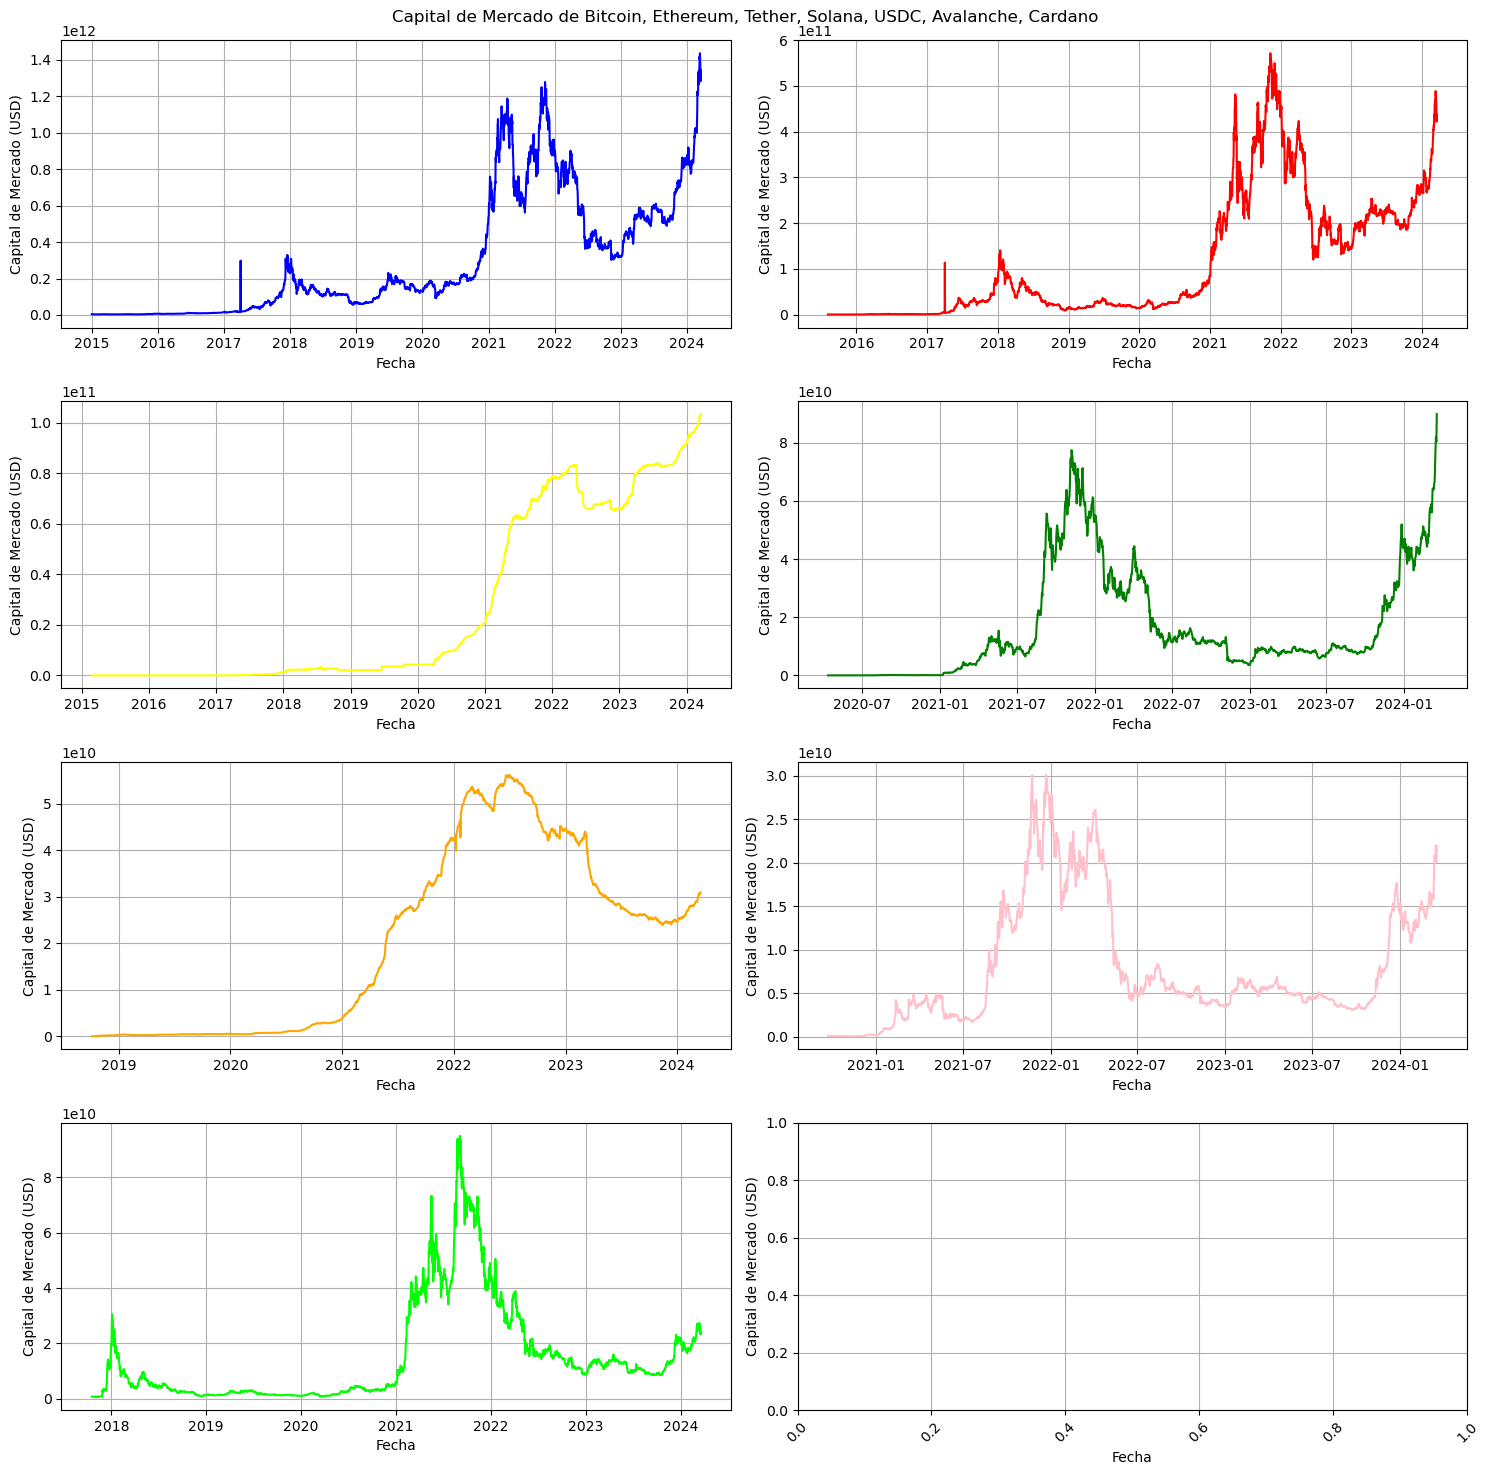

In [159]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

axs[0, 0].plot(df_bit['date'], df_bit['market_cap'], label='Bitcoin', color='blue')
axs[0, 1].plot(df_eth['date'], df_eth['market_cap'], label='Ethereum', color='red')
axs[1, 0].plot(df_tet['date'], df_tet['market_cap'], label='Tether', color='yellow')
axs[1, 1].plot(df_sol['date'], df_sol['market_cap'], label='Solana', color='green')
axs[2, 0].plot(df_usdc['date'], df_usdc['market_cap'], label='USDC', color='orange')
axs[2, 1].plot(df_ava['date'], df_ava['market_cap'], label='Avalanche', color='pink')
axs[3, 0].plot(df_car['date'], df_car['market_cap'], label='Cardano', color='lime')

for ax in axs.flat:
    ax.set(xlabel='Fecha', ylabel='Capital de Mercado (USD)')
    ax.grid(True)
    if ax.get_legend():
        ax.legend()

plt.suptitle('Capital de Mercado de Bitcoin, Ethereum, Tether, Solana, USDC, Avalanche, Cardano')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Proporción Volumen/Capitalización de Criptomenadas 

La Proporción Volumen/Capitalización (Volume/Cap) es una métrica utilizada en el análisis de criptomonedas para evaluar la actividad de trading en relación con la capitalización de mercado de una criptomoneda específica. Esta relación puede proporcionar información sobre la liquidez y el interés de los traders e inversores en esa criptomoneda en particular. Veamos qué significa cuando la gráfica de la Proporción Volumen/Capitalización sube o baja:

Proporción Volumen/Capitalización en aumento: Cuando la gráfica de la Proporción Volumen/Capitalización está subiendo, indica que el volumen de trading (la cantidad total de la criptomoneda que se ha comprado o vendido en un período de tiempo específico) está aumentando en comparación con la capitalización de mercado de esa criptomoneda. Esto puede interpretarse como un mayor interés y actividad de trading en la criptomoneda, lo que puede ser una señal de que los traders e inversores están más activos en ese mercado y hay una mayor liquidez disponible.

Proporción Volumen/Capitalización en descenso: Por el contrario, cuando la gráfica de la Proporción Volumen/Capitalización está bajando, indica que el volumen de trading está disminuyendo en relación con la capitalización de mercado. Esto podría significar una disminución en el interés de los traders e inversores en esa criptomoneda, una menor actividad de trading y posiblemente una menor liquidez en el mercado. Una Proporción Volumen/Capitalización en descenso podría ser una señal de que el mercado está menos activo o menos líquido en comparación con períodos anteriores.

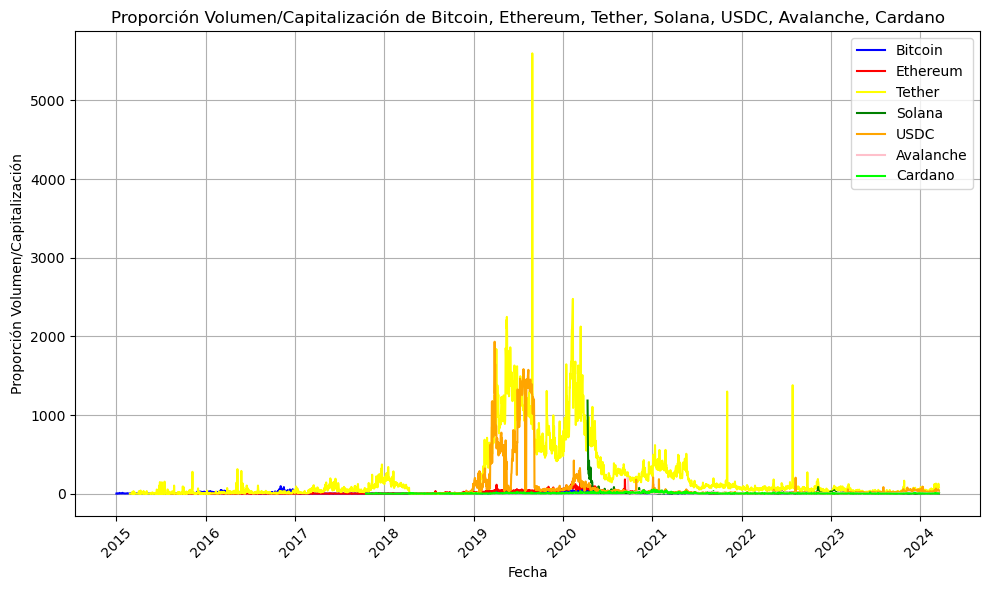

In [161]:
plt.figure(figsize=(10, 6)) 

plt.plot(df_bit['date'], df_bit['proporcion'], label='Bitcoin', color='blue')

plt.plot(df_eth['date'], df_eth['proporcion'], label='Ethereum', color='red')

plt.plot(df_tet['date'], df_tet['proporcion'], label='Tether', color='yellow')

plt.plot(df_sol['date'], df_sol['proporcion'], label='Solana', color='green')

plt.plot(df_usdc['date'], df_usdc['proporcion'], label='USDC', color='orange')

plt.plot(df_ava['date'], df_ava['proporcion'], label='Avalanche', color='pink')

plt.plot(df_car['date'], df_car['proporcion'], label='Cardano', color='lime')

plt.title('Proporción Volumen/Capitalización de Bitcoin, Ethereum, Tether, Solana, USDC, Avalanche, Cardano') 
plt.xlabel('Fecha') 
plt.ylabel('Proporción Volumen/Capitalización') 
plt.legend()  

plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

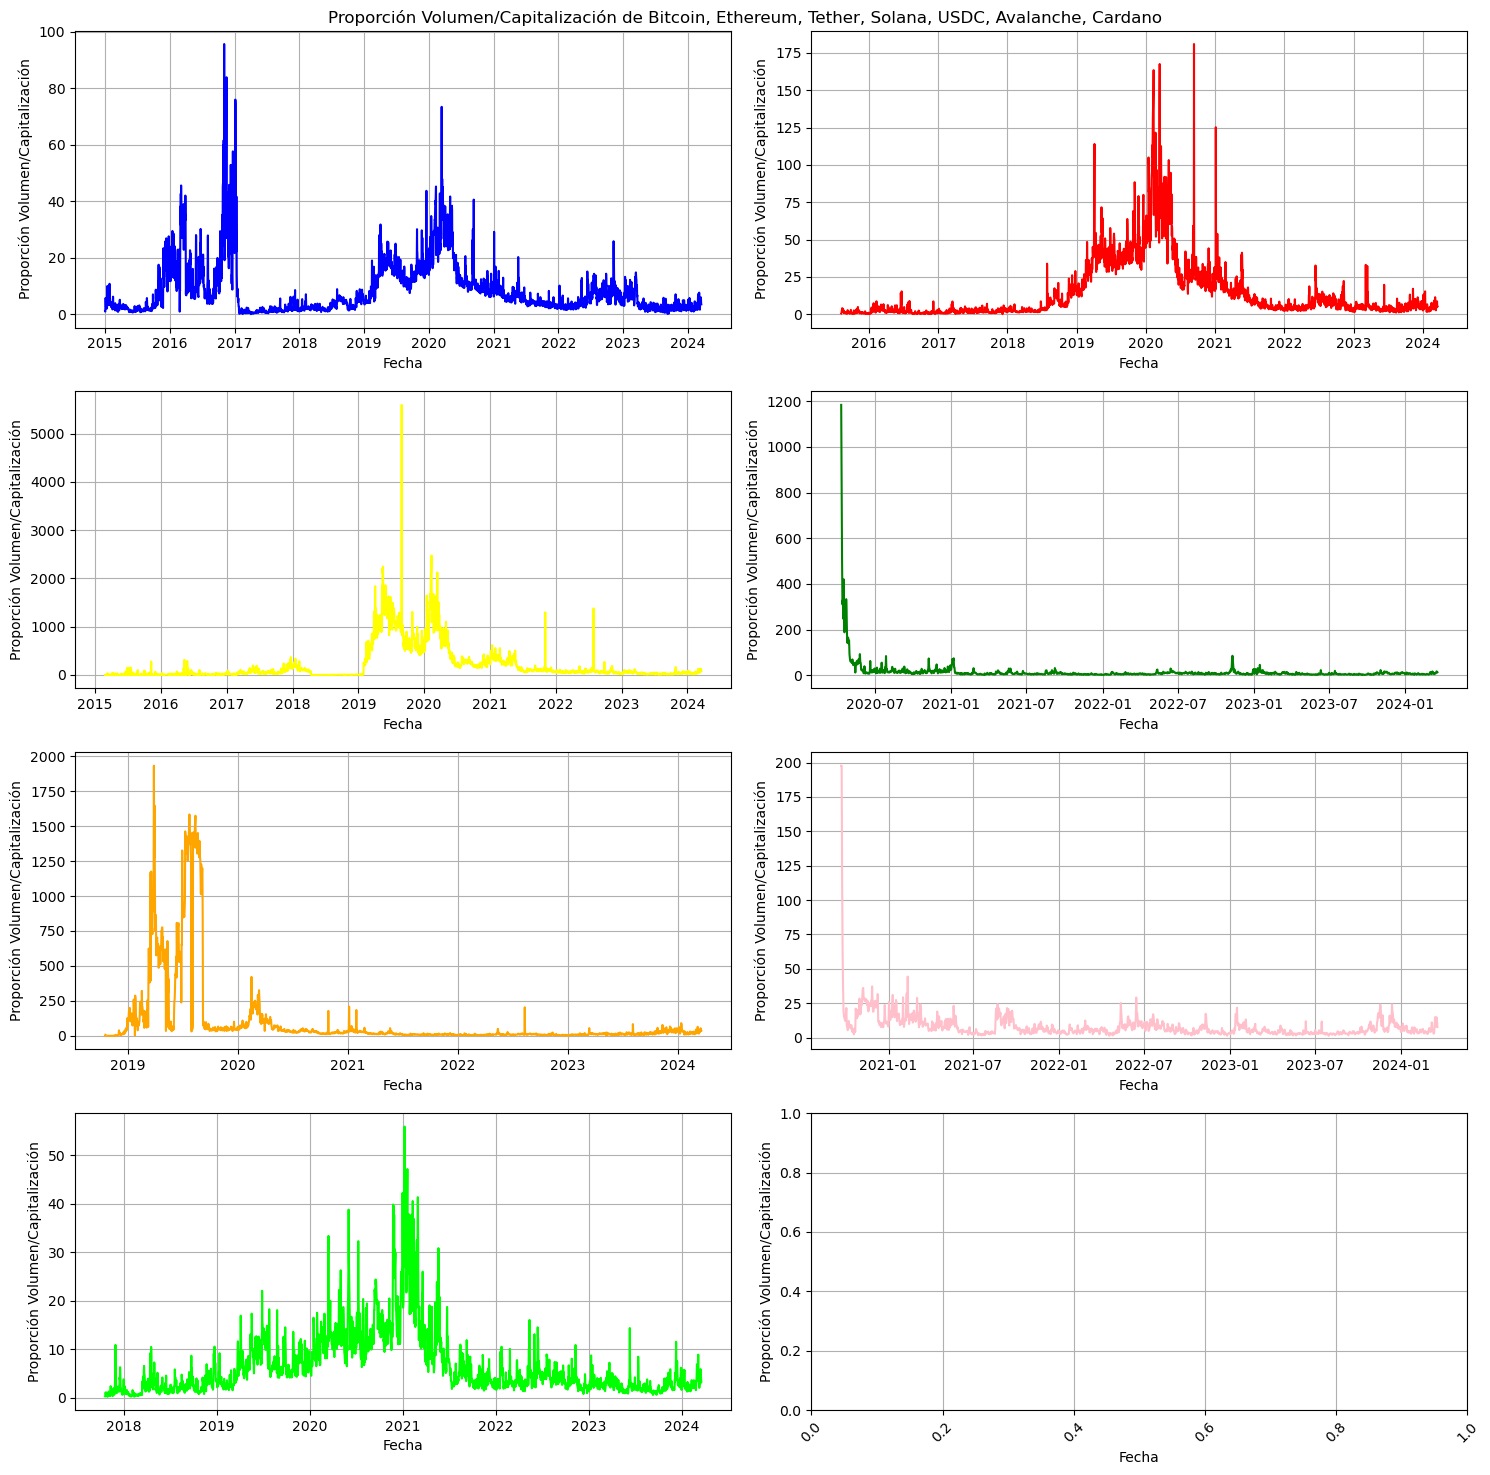

In [163]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

axs[0, 0].plot(df_bit['date'], df_bit['proporcion'], label='Bitcoin', color='blue')
axs[0, 1].plot(df_eth['date'], df_eth['proporcion'], label='Ethereum', color='red')
axs[1, 0].plot(df_tet['date'], df_tet['proporcion'], label='Tether', color='yellow')
axs[1, 1].plot(df_sol['date'], df_sol['proporcion'], label='Solana', color='green')
axs[2, 0].plot(df_usdc['date'], df_usdc['proporcion'], label='USDC', color='orange')
axs[2, 1].plot(df_ava['date'], df_ava['proporcion'], label='Avalanche', color='pink')
axs[3, 0].plot(df_car['date'], df_car['proporcion'], label='Cardano', color='lime')

for ax in axs.flat:
    ax.set(xlabel='Fecha', ylabel='Proporción Volumen/Capitalización')
    ax.grid(True)
    if ax.get_legend():
        ax.legend()

plt.suptitle('Proporción Volumen/Capitalización de Bitcoin, Ethereum, Tether, Solana, USDC, Avalanche, Cardano')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

# La criptomoneda con la menor desviación estándar

In [169]:
### Calcular la media de cada criptomoneda
media_criptomonedas = {
    'Bitcoin': df_bit['price'].mean(),
    'Ethereum': df_eth['price'].mean(),
    'Tether': df_tet['price'].mean(),
    'Solana': df_sol['price'].mean(),
    'USDC': df_usdc['price'].mean(),
    'Avalanche': df_ava['price'].mean(),
    'Cardano': df_car['price'].mean()
}

# Convertir el diccionario a un DataFrame para facilitar el cálculo de la desviación estándar
df_media_criptomonedas = pd.DataFrame(list(media_criptomonedas.items()), columns=['Criptomoneda', 'Media'])

# Calcular la desviación estándar de cada criptomoneda
desviacion_estandar_criptomonedas = {
    'Bitcoin': df_bit['price'].std(),
    'Ethereum': df_eth['price'].std(),
    'Tether': df_tet['price'].std(),
    'Solana': df_sol['price'].std(),
    'USDC': df_usdc['price'].std(),
    'Avalanche': df_ava['price'].std(),
    'Cardano': df_car['price'].std()
}

# Convertir el diccionario a un DataFrame para facilitar la comparación
df_desviacion_estandar_criptomonedas = pd.DataFrame(list(desviacion_estandar_criptomonedas.items()), columns=['Criptomoneda', 'Desviación Estándar'])

# Seleccionar la criptomoneda con la menor desviación estándar
criptomoneda_menor_desviacion = df_desviacion_estandar_criptomonedas.loc[df_desviacion_estandar_criptomonedas['Desviación Estándar'].idxmin()]['Criptomoneda']

# Mostrar resultados
print("Media de cada criptomoneda:")
print(df_media_criptomonedas)
print("\nDesviación estándar de cada criptomoneda:")
print(df_desviacion_estandar_criptomonedas)
print("\nLa criptomoneda con la menor desviación estándar es:", criptomoneda_menor_desviacion)

Media de cada criptomoneda:
  Criptomoneda         Media
0      Bitcoin  15875.030507
1     Ethereum    971.076804
2       Tether      1.000742
3       Solana     48.822222
4         USDC      1.001080
5    Avalanche     30.995631
6      Cardano      0.467203

Desviación estándar de cada criptomoneda:
  Criptomoneda  Desviación Estándar
0      Bitcoin         17016.864824
1     Ethereum          1120.050260
2       Tether             0.014989
3       Solana            54.952004
4         USDC             0.004313
5    Avalanche            27.529221
6      Cardano             0.565299

La criptomoneda con la menor desviación estándar es: USDC


# La criptomoneda más volátil

In [165]:
# Calcular la diferencia entre el valor máximo y mínimo de cada criptomoneda
diferencia_max_min = {
    'Bitcoin': df_bit['price'].max() - df_bit['price'].min(),
    'Ethereum': df_eth['price'].max() - df_eth['price'].min(),
    'Tether': df_tet['price'].max() - df_tet['price'].min(),
    'Solana': df_sol['price'].max() - df_sol['price'].min(),
    'USDC': df_usdc['price'].max() - df_usdc['price'].min(),
    'Avalanche': df_ava['price'].max() - df_ava['price'].min(),
    'Cardano': df_car['price'].max() - df_car['price'].min()
}

# Convertir el diccionario a un DataFrame para facilitar la comparación
df_diferencia_max_min = pd.DataFrame(list(diferencia_max_min.items()), columns=['Criptomoneda', 'Diferencia Max-Min'])

# Obtener la criptomoneda más volátil
criptomoneda_mas_volatil = df_diferencia_max_min.loc[df_diferencia_max_min['Diferencia Max-Min'].idxmax()]['Criptomoneda']
valor_diferencia_max_min = df_diferencia_max_min.loc[df_diferencia_max_min['Diferencia Max-Min'].idxmax()]['Diferencia Max-Min']

# Mostrar resultados
print("Diferencia entre el valor máximo y mínimo de cada criptomoneda:")
print(df_diferencia_max_min)
print("\nLa criptomoneda más volátil es:", criptomoneda_mas_volatil)
print("La diferencia máxima entre máximo y mínimo es:", valor_diferencia_max_min)

Diferencia entre el valor máximo y mínimo de cada criptomoneda:
  Criptomoneda  Diferencia Max-Min
0      Bitcoin        72925.619127
1     Ethereum         4814.571656
2       Tether            0.750574
3       Solana          258.725635
4         USDC            0.077886
5    Avalanche          131.555682
6      Cardano            2.945755

La criptomoneda más volátil es: Bitcoin
La diferencia máxima entre máximo y mínimo es: 72925.61912694128


---

# Moneda mas estable 

In [167]:
# Calcular la desviación estándar de cada criptomoneda
desviacion_estandar = {
    'Bitcoin': df_bit['price'].std(),
    'Ethereum': df_eth['price'].std(),
    'Tether': df_tet['price'].std(),
    'Solana': df_sol['price'].std(),
    'USDC': df_usdc['price'].std(),
    'Avalanche': df_ava['price'].std(),
    'Cardano': df_car['price'].std()
}

# Convertir el diccionario a un DataFrame para facilitar la comparación
df_desviacion_estandar = pd.DataFrame(list(desviacion_estandar.items()), columns=['Criptomoneda', 'Desviación Estándar'])

# Obtener la criptomoneda más estable
criptomoneda_mas_estable = df_desviacion_estandar.loc[df_desviacion_estandar['Desviación Estándar'].idxmin()]['Criptomoneda']
valor_desviacion_estandar_min = df_desviacion_estandar.loc[df_desviacion_estandar['Desviación Estándar'].idxmin()]['Desviación Estándar']

# Mostrar resultados
print("Desviación estándar de cada criptomoneda:")
print(df_desviacion_estandar)
print("\nLa criptomoneda más estable es:", criptomoneda_mas_estable)
print("Valor de desviación estándar mínima:", valor_desviacion_estandar_min)

Desviación estándar de cada criptomoneda:
  Criptomoneda  Desviación Estándar
0      Bitcoin         17016.864824
1     Ethereum          1120.050260
2       Tether             0.014989
3       Solana            54.952004
4         USDC             0.004313
5    Avalanche            27.529221
6      Cardano             0.565299

La criptomoneda más estable es: USDC
Valor de desviación estándar mínima: 0.004312507146089303


---